In [1]:
#initial imports
from collections import Counter
from IPython.display import clear_output
import json
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
import sys
import time
#BeautifulSoup
from bs4 import BeautifulSoup
#gensim
import bz2
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import multiprocessing
import gensim
from gensim import corpora
from gensim import models
import pickle
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
from gensim.models import Phrases
#NLTK
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords # Import the stop word list
from nltk import word_tokenize
from nltk.corpus import wordnet as wn
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
#plotly
import plotly.plotly as py
from plotly.graph_objs import *
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.figure_factory as ff
from  plotly  import __version__
#plotly offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
#SpaCy
import spacy
spacy.load('en')
from spacy.lang.en import English

2019-02-19 21:05:38,461 : INFO : 'pattern' package not found; tag filters are not available for English
/anaconda3/lib/python3.6/site-packages/ipywidgets/widgets/widget.py:281: DeprecationWarning:

Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.



3.1.0


In [2]:
df = pd.read_csv('~/Desktop/Final Capstone/jobs_db.csv')
pd.set_option('display.max_colwidth', -1)

In [3]:
df.head(10)

id  \
0  15   
1  16   
2  17   
3  18   
4  19   
5  20   
6  21   
7  22   
8  23   
9  24   

                                                                                                                                                                                                 title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                                                                  
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                                                                  
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                                                                
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                                                                    
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Data Scientist, Natural Language Processing (NLP), descriptive statistics, statistical modelling, machine learning</h3>   
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer, Natural Language Processing /NLP</h3>                                                                  
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing and Machine Learning Engineer</h3>                                                            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Turn our df into X, for later use with modelling, train_test_split and getting a y column.

In [4]:
X = df

## EDA and Data Cleaning

Since we web scraped, the text is in pretty raw format.  To get it into useable shape, I plan to get rid of the html code before tokenizing and lemmatizing it. I'll also check for duplicates, and remove any to keep the results as clean as possible.  From here, it will be easier to determine what words can be added as stop words, or, are meaningful to the analysis in some way.

In [5]:
#Let's check for unique job descriptions. 
#If we drop some duplicates, we'll run our cleaning on less data, which is faster.
X.nunique()

id                 7882
title              3464
job_description    4334
job_class          9   
dtype: int64

In [6]:
X.job_class.unique()

array(['Natural Language Processing', 'Text Mining',
       'Pattern Recognition', 'Machine Learning', 'Computer Vision',
       'Text Analytics', 'Apache Spark', 'Speech Recognition',
       'Neural Networks'], dtype=object)

In [7]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Pattern Recognition            792
Text Analytics                 795
Neural Networks                827
Computer Vision                829
Natural Language Processing    881
Apache Spark                   919
Machine Learning               934
Speech Recognition             944
Text Mining                    961
Name: job_description, dtype: int64

In [8]:
#It stands to reason that we would want to keep the unique job descriptions, because titles like "Data Scientist"
#are broadly used in the field and not necessarily problematic for the scope of this project.
X = X.drop_duplicates(['job_description'], keep = 'last')

In [9]:
#Let's check to make sure we dropped what we had intended.
X.nunique()

id                 4334
title              3431
job_description    4334
job_class          9   
dtype: int64

In [10]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Text Analytics                 171
Text Mining                    171
Pattern Recognition            321
Natural Language Processing    510
Machine Learning               573
Computer Vision                633
Apache Spark                   645
Speech Recognition             648
Neural Networks                662
Name: job_description, dtype: int64

The sum of our "female dominated fields is 1,500 which is 34.6% of our dataset. I'm going to drop rows that are Computer Vision job descriptions.  This should help even out the imbalance, and that particular field was the most "gender-balanced" out of the male-dominated job descriptions we have above.

In [11]:
#Dropping Computer Vision
X = X[X.job_class != 'Computer Vision']

In [12]:
X.reset_index(drop=True, inplace=True)

In [13]:
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                                                                                                      title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                          
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                       
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                       
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                     
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                         
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research - Natural Language Processing(NLP) Scientist</h3>                  
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Analytical Linguist, Google AI</h3>                                            
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">IBM Research AI Residency Program</h3>                                         
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research Engineer – Natural Language Processing</h3>                        
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer: Machine Learning - Natural Language Processing (NLP)</h3>   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [14]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Text Analytics                 171
Text Mining                    171
Pattern Recognition            321
Natural Language Processing    510
Machine Learning               573
Apache Spark                   645
Speech Recognition             648
Neural Networks                662
Name: job_description, dtype: int64

Although we lost a large portion of the dataset due to duplicates, it's important to prioritize quality over quantity. I evaluated the dataset to ensure that there would not be a class imbalance problem.  Now, our female-dominated fields comprise 40% of the job descriptions, this is pretty good considering we're working with scraped data. So, we'll proceed with cleaning up the dataset, so we can put it into BoW and Tf-Idf and then run some models on it!

In [15]:
#A quick view of the dataset to see what we might need to clean.
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                                                                                                      title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                          
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                       
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                       
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                     
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                         
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research - Natural Language Processing(NLP) Scientist</h3>                  
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Analytical Linguist, Google AI</h3>                                            
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">IBM Research AI Residency Program</h3>                                         
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research Engineer – Natural Language Processing</h3>                        
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer: Machine Learning - Natural Language Processing (NLP)</h3>   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

Lots of HTML script here, as expected. Let's get some of that cleaned up before we tokenize.

In [16]:
X['job_description'] = X['job_description'].replace(r'div class="jobsearch-JobComponent-description icl-u-xs-mt--md"><div></div><div><div><div><b>', '', regex=True).replace(r'</div', '', regex=True)

In [17]:
X['title'] = X['title'].replace(r'<h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">', '', regex=True).replace(r'</h3>', '', regex=True)

In [18]:
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                     title  \
0  Research Scientist - Natural Language Processing                          
1  Natural Language Processing Engineer, New York City                       
2  Research Programmer I - Natural Language Processing                       
3  Siri - Natural Language Processing Scientist/Engineer                     
4  NLP and Machine Learning Graduate                                         
5  AI Research - Natural Language Processing(NLP) Scientist                  
6  Analytical Linguist, Google AI                                            
7  IBM Research AI Residency Program                                         
8  AI Research Engineer – Natural Language Processing                        
9  Software Engineer: Machine Learning - Natural Language Processing (NLP)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

Much better, our job titles look really nice at this point. Onward!

In [19]:
X['job_description'] = X['job_description'].replace(r'<div class="jobsearch-JobComponent-description icl-u-xs-mt--md">', '', regex=True)


In [20]:
X.sample(10)

id  \
2727  6609   
2231  5944   
334   648    
1922  5541   
1950  5582   
2269  5999   
2401  6163   
1895  5505   
2826  6740   
1755  4916   

                                                                       title  \
2727  Software Engineer                                                        
2231  Modern Data Engineer                                                     
334   Senior Data Scientist                                                    
1922  Data Engineer                                                            
1950  Labor Systems Projects &amp; Analytics Internship - Orlando, Fall 2019   
2269  Senior Software Engineer - Backend                                       
2401  Dispatcher                                                               
1895  Software Development Engineer in Test with Python/Java/Scala and Spark   
2826  Senior Interaction Engineer                                              
1755  Consultant - RPA                                                         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [21]:
len(X)

3701

In [22]:
#This will get rid of most of the html markers that are within <>
def clean_html(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [23]:
for text in X:
    for i in range(len(X)):
        X['job_description'][i] = clean_html(X['job_description'][i])

This took under 10 seconds to run.

In [24]:
X.sample(25)

id  \
1754  4913   
1181  3056   
1203  3093   
340   660    
1319  3268   
2500  6305   
2956  6934   
2852  6778   
2257  5983   
1964  5603   
395   735    
2385  6131   
564   1008   
3603  7810   
1882  5487   
2515  6327   
3600  7807   
3192  7273   
1927  5551   
1656  4523   
2445  6232   
3156  7227   
1169  3033   
1498  3505   
3024  7049   

                                                                       title  \
1754  Data Scientist                                                           
1181  Machine Learning for Audo Analytics Intern                               
1203  Data Collection Administrator                                            
340   Account Manager                                                          
1319  Senior Machine Learning Engineer                                         
2500  Career Counselor                                                         
2956  Machine Learning Scientist- Natural Language Processing                  
2852  Senior Machine Learning Engineer                                         
2257  Principal Software Engineer                                              
1964  Senior Software Engineer - Spark                                         
395   Senior Data Engineer                                                     
2385  Developer/Senior Developer, IT Applications                              
564   Data Scientist - Financial Services Lab                                  
3603  None                                                                     
1882  Software Engineer Intern                                                 
2515  IT PACS Administrator                                                    
3600  Design Verification Intern                                               
3192  Analytics, Predictive Analytics and Machine Learning - Senior Director   
1927  Analytics Engineer                                                       
1656  Data Scientist - Text Analytics                                          
2445  Acoustic Modeling Engineer                                               
3156  Associate Data Scientist                                                 
1169  Youtube Influencer (computer hardware, unboxing, benchmarks)             
1498  Lead Software Engineer - Machine Learning                                
3024  RN (PRN Rehab) - Lenoir Woods                                            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

That worked like a charm! Let's continue cleaning.

In [25]:
X['job_description'] = X['job_description'].replace(r'\n', ' ', regex=True)

In [26]:
X.sample(25)

id  \
949   2252   
788   2033   
1463  3461   
1222  3124   
3426  7606   
1599  4455   
2793  6695   
3259  7359   
3256  7356   
3412  7589   
3314  7459   
2521  6334   
3026  7051   
529   937    
2377  6122   
1047  2762   
54    152    
2937  6911   
2639  6500   
2499  6304   
291   572    
493   873    
2789  6689   
1523  3532   
1346  3302   

                                                                                           title  \
949   NLP/ML Data Analytics Technical Architect                                                    
788   Software Engineer                                                                            
1463  Machine Learning - Feature Engineer - GPShopper                                              
1222  Machine Learning / Artificial Intelligence Scientist                                         
3426  Research Assistant II - NM                                                                   
1599  Customer Experience Analyst                                                                  
2793  Nordic Grooming Supervisor                                                                   
3259  Intern, Strategic Analytics - Marketing - Part-Time                                          
3256  Information Scientist                                                                        
3412  Data Scientist                                                                               
3314  Machine Learning Scientist                                                                   
2521  Senior Researcher                                                                            
3026  RN Full-time Evening Shift at St. Joseph's Bluffs Rehabilitation unit, $10K sign-on bonus.   
529   Data Scientist - Amazon Music NLU                                                            
2377  Lead Salesforce Developer                                                                    
1047  Research Scientist - Machine Learning                                                        
54    Senior Test Developer - Language Assessments                                                 
2937  LT Steak &amp; Seafood - Food Runner                                                         
2639  ML Scientist                                                                                 
2499  Academic Program Coordinator II                                                              
291   Computational Linguist with English India (Hindi Locale)                                     
493   Sr. IT Analyst, Data Science                                                                 
2789  Principal Engineer, Algorithms Voice Interfaces ( Tech Lead)                                 
1523  Machine Learning Research Scientist - Cybersecurity Applications (Entry-Level) - 2010950     
1346  Data Scientist - Applied Machine Learning Engineer                                           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [27]:
X['job_description'] = X['job_description'].replace(r'&amp;', ' ', regex=True)

In [28]:
X['title'] = X['title'].replace(r'&amp;', ' ', regex=True)

In [29]:
X.sample(25)

id  \
51    148    
1471  3471   
2644  6511   
837   2105   
1301  3236   
735   1956   
864   2141   
2394  6142   
770   2003   
627   1090   
585   1038   
1959  5592   
807   2059   
1967  5606   
1385  3363   
1021  2697   
1923  5542   
1905  5519   
2023  5684   
2010  5663   
2037  5704   
3019  7007   
3507  7701   
2294  6030   
3518  7714   

                                                                                          title  \
51    General - NLP Scientist                                                                     
1471  Data Scientist                                                                              
2644  PrincipalTechnical Program Manager - Alexa Machine Learning Platform                        
837   Data Scientist                                                                              
1301  Product Data Operations Intern                                                              
735   Quantitative Software Engineer - Campus Hire                                                
864   Intern Data Science (Summer 2019)                                                           
2394  AI P R Speech Scientist   Engineer – Acoustic Signal Processing and Modeling                
770   EEG TECHNICIAN                                                                              
627   Operations Research Analyst                                                                 
585   Data Scientist                                                                              
1959  Principal Product Manager, AWS Glue                                                         
807   Data Scientist                                                                              
1967  Machine Learning Scientist - Security                                                       
1385  PWM Technology - Ayco - Analyst- Production Response and Monitoring                         
1021  Machine Learning Engineer                                                                   
1923  Junior Java/Scala Developer                                                                 
1905  Software Development Engineer                                                               
2023  Applications Consultant 2 - Spark Developer                                                 
2010  Data Science Engineer                                                                       
2037  Senior Data Engineer, Infrastructure                                                        
3019  Sr Director, AI Artificial Intelligence Capability Lead Technology                          
3507  Deep Learning Software Engineer                                                             
2294  DevOps Lead - Real Time   Big Data                                                          
3518  Assistant/Associate Professor- Machine learning, neural networks, artificial intelligence   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [30]:
X['job_description'] = X['job_description'].replace(r'>', ' ', regex=True)

In [31]:
X.sample(25)

id  \
1959  5592   
1587  4440   
2757  6646   
1839  5344   
1424  3412   
699   1902   
2007  5660   
2008  5661   
3157  7228   
3579  7786   
386   725    
2292  6028   
2606  6450   
791   2039   
1786  5043   
636   1108   
2423  6203   
299   590    
1048  2768   
1626  4488   
1068  2809   
128   283    
1168  3032   
224   455    
253   507    

                                                                               title  \
1959  Principal Product Manager, AWS Glue                                              
1587  Data Science Intern - RISI                                                       
2757  Recreation Assistant Manager - Thompson Boat Center                              
1839  Advanced Analytics Summer Intern                                                 
1424  Machine Learning Consultant                                                      
699   Algorithmic Trading Developer                                                    
2007  Staff Software Engineer, Scale                                                   
2008  Big Data Engineer                                                                
3157  Senior Data Scientist                                                            
3579  Research Intern – Speech Recognition/Language Modeling                           
386   Information Security Engineer                                                    
2292  Senior Software Engineer, Android Platform                                       
2606  TDOT OPERATIONS TECHNICIAN                                                       
791   Summer Research Program Intern--BS/MS Candidates                                 
1786  Senior Manager, Demand Generation                                                
636   Senior Data Scientist                                                            
2423  Sr. Customer Experience Representative - Speech Recognition and Search Product   
299   AD, Robotics Process Automation                                                  
1048  Machine Learning Specialist                                                      
1626  Program Integrity Healthcare Data Analyst                                        
1068  ACTV Machine Learning Engineer Intern                                            
128   Senior Data Scientist                                                            
1168  NLP/Machine Learning Engineer                                                    
224   Data Scientist                                                                   
253   iOS Developer                                                                    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

The last regex left quite a bit of whitespace, which isn't useful. Let's strip that before moving on.

In [32]:
X['job_description'] = X['job_description'].str.strip()

In [33]:
X.sample(25)

id  \
781   2023   
2929  6900   
179   363    
2478  6278   
2878  6833   
216   442    
1947  5578   
3096  7152   
2447  6234   
3662  7871   
2395  6143   
584   1037   
1707  4596   
259   520    
3192  7273   
3145  7214   
3487  7674   
3407  7584   
1198  3087   
1258  3170   
1885  5492   
1496  3503   
1303  3239   
3355  7513   
1874  5479   

                                                                            title  \
781   Senior Manager, Global Pricing Strategy-Orthopedics (Spine, Trauma, Sports)   
2929  Advanced Natural Language Computer Scientist                                  
179   Researcher - AI                                                               
2478  Consumer Solutions Specialist                                                 
2878  Assistant Housekeeping Manager                                                
216   Solution Architect                                                            
1947  Distinguished Data Engineer                                                   
3096  Senior Data Scientist                                                         
2447  Artificial Intelligence Technology Specialist                                 
3662  Sr. Machine Learning Scientist                                                
2395  Conversation Designer (VUI)                                                   
584   Data Scientist                                                                
1707  Lead Application Developer                                                    
259   NLP Data Scientist                                                            
3192  Analytics, Predictive Analytics and Machine Learning - Senior Director        
3145  Software Engineering Co-Op                                                    
3487  Research Engineer: Novel Neuromorphic Device Architecture                     
3407  SOC RTL Engineer                                                              
1198  Machine Learning Engineer                                                     
1258  Staff Machine Learning Engineer                                               
1885  Technical Data Analyst                                                        
1496  Data Scientist (Splunk)                                                       
1303  Autopilot Internship/Co-Op (Summer 2019)                                      
3355  Software Engineer Intern                                                      
1874  Technical Architect                                                           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [34]:
#We don't need the ids that populated in the SQLite Database
X = X.drop(['id'], axis=1)

In [35]:
X.head(10)

title  \
0  Research Scientist - Natural Language Processing                          
1  Natural Language Processing Engineer, New York City                       
2  Research Programmer I - Natural Language Processing                       
3  Siri - Natural Language Processing Scientist/Engineer                     
4  NLP and Machine Learning Graduate                                         
5  AI Research - Natural Language Processing(NLP) Scientist                  
6  Analytical Linguist, Google AI                                            
7  IBM Research AI Residency Program                                         
8  AI Research Engineer – Natural Language Processing                        
9  Software Engineer: Machine Learning - Natural Language Processing (NLP)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [36]:
#Let's remove punctuation.
def punctuation_remover(row):
    punctuation = '!"#$&\'()*+,-./:;<=>?@[\\]^_`{|}~«»'  
    
    punctuationNoPeriod = "[" + re.sub("\.","", punctuation) + "]"
    row = re.sub(punctuationNoPeriod, " ", str(row))
    #to remove double white spaces and create space after %,
    row = row.replace('  ', ' ')
    row = row.replace('%', '% ')
    return row.strip()

<input>:5: DeprecationWarning:

invalid escape sequence \.

<input>:5: DeprecationWarning:

invalid escape sequence \.

<input>:5: DeprecationWarning:

invalid escape sequence \.

<ipython-input-36-b2830c59b60e>:5: DeprecationWarning:

invalid escape sequence \.



In [37]:
# remove punctuation from the job titles first
X['title'] = X['title'].apply(punctuation_remover)

In [38]:
X.head(10)

title  \
0  Research Scientist  Natural Language Processing                       
1  Natural Language Processing Engineer New York City                    
2  Research Programmer I  Natural Language Processing                    
3  Siri  Natural Language Processing Scientist Engineer                  
4  NLP and Machine Learning Graduate                                     
5  AI Research  Natural Language Processing NLP Scientist                
6  Analytical Linguist Google AI                                         
7  IBM Research AI Residency Program                                     
8  AI Research Engineer – Natural Language Processing                    
9  Software Engineer Machine Learning  Natural Language Processing NLP   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [39]:
#Since that worked well, let's now remove punctuation from the job descriptions.
X['job_description'] = X['job_description'].apply(punctuation_remover)

In [40]:
X.head(10)

title  \
0  Research Scientist  Natural Language Processing                       
1  Natural Language Processing Engineer New York City                    
2  Research Programmer I  Natural Language Processing                    
3  Siri  Natural Language Processing Scientist Engineer                  
4  NLP and Machine Learning Graduate                                     
5  AI Research  Natural Language Processing NLP Scientist                
6  Analytical Linguist Google AI                                         
7  IBM Research AI Residency Program                                     
8  AI Research Engineer – Natural Language Processing                    
9  Software Engineer Machine Learning  Natural Language Processing NLP   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [41]:
X['gender_breakdown'] = X['job_class']

In [42]:
X.job_class.unique()

array(['Natural Language Processing', 'Text Mining',
       'Pattern Recognition', 'Machine Learning', 'Text Analytics',
       'Apache Spark', 'Speech Recognition', 'Neural Networks'],
      dtype=object)

In [43]:
X.loc[X['gender_breakdown'] == 'Natural Language Processing', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Text Mining', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Text Analytics', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Speech Recognition', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Pattern Recognition', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Machine Learning', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Apache Spark', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Neural Networks', 'gender_breakdown'] = 0

In [44]:
X.sample(5)

title  \
2360  Tech Lead  Core Java                                
3069  Machine Learning Engineer Conversational AI Group   
2477  Regional Sales Director Government Sales 19 102     
3692  Advanced Technology Specialist                      
1118  Intern Machine Learning  Remote Sensing Cities      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

## Unsupervised Approach

I'll use the Latend Dirichlet Allocation method first, and then use it with bigrams and trigrams. I will evalute for coherence, and tune the models.

In [45]:
#First step, tokenizer.
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [46]:
nltk.download('wordnet')
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tiffanyfrench/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
#nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
stop_words = en_stop.union(set(['machine','business','analytics','learning','technology',
                              'system', 'science', 'research', 'analysis', 'experience',
                               'customer', 'include', 'plant', 'clerkship', 'language',
                               'university', 'google', 'hadoop']))

In [48]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [49]:
import random
text_data = []
for text in X:
    for i in range(len(X)):
        tokens = prepare_text_for_lda(X['job_description'][i])
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)

['apply', 'position', 'application', 'automatically', 'submit', 'following', 'location', 'kirkland', 'seattle', 'mountain', 'minimum', 'qualification', 'completion', 'degree', 'computer', 'relate', 'technical', 'field', 'study', 'equivalent', 'practical', 'include', 'computer', 'coursework', 'later', 'august', 'programming', 'following', 'general', 'purpose', 'programming', 'language', 'javascript', 'python', 'authorization', 'legally', 'unite', 'state', 'prefer', 'qualification', 'structure', 'algorithm', 'complexity', 'complete', 'coursework', 'course', 'project', 'individual', 'project', 'internship', 'practical', 'outside', 'school', 'relevant', 'source', 'contribution', 'competitive', 'programming', 'exposure', 'hands', 'coding', 'general', 'purpose', 'programming', 'interest', 'ability', 'learn', 'environment', 'focus', 'knowledge', 'sharing', 'collaboration', 'strong', 'communication', 'skill', 'include', 'working', 'proficiency', 'communication', 'skill', 'verbal', 'write', 'en

['please', 'apply', 'original', 'resume', 'indeed', 'generate', 'version', 'order', 'consider', 'interview', 'process', 'application', 'submit', 'without', 'resume', 'original', 'version', 'process', 'review', 'enterprise', 'privately', 'generation', 'services', 'found', 'former', 'leaders', 'executive', 'burgeon', 'start', 'focusing', 'deliver', 'services', 'major', 'product', 'oracle', 'peoplesoft', 'edwards', 'lawson', 'leading', 'cloud', 'application', 'workday', 'taleo', 'success', 'factor', 'salesforce', 'operate', 'utilize', 'virtual', 'consult', 'platform', 'scientist', 'engineer', 'management', 'consultant', 'deliver', 'global', 'engagement', 'platform', 'base', 'natural', 'processing', 'locate', 'across', 'street', 'street', 'beach', 'coast', 'neighborhood', 'chicago', 'addition', 'beautiful', 'environment', 'offer', 'benefit', 'vacation', 'holiday', 'membership', 'analyst', 'talent', 'delivery', 'responsibility', 'analyst', 'support', 'strategic', 'process', 'talent', 'deliv

['instabase', 'found', 'instabase', 'mission', 'advance', 'state', 'building', 'tool', 'people', 'solve', 'important', 'problem', 'discovery', 'create', 'breakthrough', 'instabase', 'operate', 'design', 'operational', 'efficiency', 'browser', 'interface', 'pluggable', 'storage', 'manage', 'file', 'database', 'store', 'application', 'application', 'instabase', 'platform', 'provide', 'management', 'capability', 'manage', 'diverse', 'distribute', 'datasets', 'support', 'collaboration', 'access', 'control', 'runtime', 'instabase', 'application', 'application', 'state', 'tool', 'processing', 'diverse', 'unstructured', 'scan', 'image', 'excel', 'document', 'email', 'website', 'running', 'extensible', 'function', 'server', 'framework', 'natural', 'processing', 'image', 'processing', 'classification', 'clustering', 'customer', 'large', 'enterprise', 'operational', 'costs', 'variety', 'domain', 'financial', 'services', 'banks', 'insurance', 'healthcare', 'logistics', 'supply', 'chain', 'profit'

['remote', 'applicant']
['internship', 'description', 'conduct', 'advance', 'reinforcement', 'apply', 'result', 'world', 'application', 'quality', 'implementation', 'integrate', 'result', 'software', 'exist', 'bosch', 'platform', 'summarize', 'findings', 'quality', 'paper', 'patent', 'submission', 'qualification', 'require', 'strong', 'background', 'representation', 'optimization', 'generative', 'model', 'proficient', 'python', 'programming', 'proficient', 'library', 'pytorch', 'tensorflow', 'strong', 'problem', 'solving', 'skill', 'communication', 'teamwork', 'skill', 'desire', 'publication', 'record', 'venue', 'hands', 'multimodal', 'sensor', 'sensor', 'additional', 'information', 'major', 'computer', 'relate', 'fields', 'degree', 'level', 'current', 'student', 'recent', 'graduate', 'start', 'possible', 'duration', 'month', 'choice', 'commit', 'diverse', 'workforce', 'protect', 'veteran', 'disabled', 'bosch', 'proud', 'supporter', 'engineering', 'mathematics', 'initiative', 'first', 

['advisor', 'consult', 'digital', 'microservices', 'development', 'manager', 'ernst', 'young', 'orlando', 'client', 'understand', 'architect', 'select', 'implement', 'cutting', 'solution', 'require', 'efficiently', 'business', 'focusing', 'digital', 'cloud', 'service', 'area', 'include', 'commerce', 'solution', 'architecture', 'mobile', 'application', 'digital', 'platform', 'architecture', 'digital', 'strategy', 'digital', 'operations', 'knowledge', 'platform', 'provide', 'client', 'unique', 'perspective', 'continue', 'innovate', 'remain', 'competitive', 'various', 'group', 'digital', 'capability', 'pursue', 'deliver', 'digital', 'engagement', 'deliver', 'solution', 'bring', 'client', 'digital', 'vision', 'strategy', 'design', 'customization', 'optimization', 'digital', 'cloud', 'base', 'solution', 'participate', 'project', 'team', 'project', 'governance', 'requirement', 'definition', 'vendor', 'selection', 'customization', 'testing', 'training', 'rollout', 'phase', 'client', 'project'

['software', 'engineer', '00048381', 'description', 'choose', 'meaningful', 'fulfil', 'mitre', 'mitre', 'people', 'commit', 'tackle', 'nation', 'tough', 'challenge', 'commit', 'employee', 'mitre', 'different', 'company', 'profit', 'corporation', 'charter', 'public', 'interest', 'commercial', 'conflict', 'influence', 'center', 'operate', 'government', 'create', 'last', 'impact', 'fields', 'diverse', 'cybersecurity', 'healthcare', 'aviation', 'defense', 'enterprise', 'transformation', 'making', 'difference', 'every', 'working', 'safe', 'healthier', 'secure', 'nation', 'world', 'workplace', 'reflect', 'values', 'offer', 'competitive', 'benefit', 'exceptional', 'professional', 'development', 'opportunity', 'culture', 'innovation', 'embrace', 'diversity', 'inclusion', 'flexibility', 'collaboration', 'career', 'growth', 'sound', 'choice', 'choose', 'mitre', 'difference', 'dynamic', 'mitre', 'hampton', 'roads', 'involve', 'deliver', 'innovative', 'solution', 'government', 'challenge', 'immedi

['month', 'location', 'position', 'fill', 'department', 'intellectual', 'developmental', 'disability', 'tennessee', 'community', 'home', 'division', 'greene', 'county', 'education', 'education', 'equivalent', 'graduation', 'accredit', 'college', 'bachelor', 'degree', 'education', 'industrial', 'nursing', 'social', 'behavioral', 'mental', 'health', 'human', 'services', 'field', 'substitution', 'education', 'qualifying', 'teaching', 'sales', 'marketing', 'provide', 'services', 'handicapped', 'person', 'substitute', 'require', 'education', 'basis', 'maximum', 'years', 'requirement', 'necessary', 'special', 'qualification', 'valid', 'vehicle', 'operator', 'license', 'require', 'employment', 'position', 'examination', 'method', 'education', 'prefer', 'service', 'position', 'overview', 'summary', 'general', 'supervision', 'perform', 'vocational', 'habilitation', 'therapy', 'average', 'difficulty', 'supervisory', 'average', 'difficulty', 'perform', 'relate', 'require', 'distinguish', 'feature

['overview', 'quality', 'engineer', 'conduct', 'test', 'determine', 'quality', 'finish', 'product', 'process', 'sample', 'return', 'product', 'scrap', 'process', 'perform', 'audit', 'responsibility', 'perform', 'product', 'testing', 'sample', 'return', 'product', 'require', 'test', 'dimensional', 'inspection', 'pressure', 'test', 'micrograph', 'hardness', 'testing', 'special', 'test', 'require', 'qualify', 'product', 'certify', 'return', 'product', 'process', 'return', 'product', 'maintain', 'report', 'manufacturing', 'location', 'vendor', 'perform', 'quality', 'audit', 'review', 'scrap', 'maintain', 'report', 'management', 'developing', 'maintain', 'statistical', 'process', 'chart', 'monitor', 'process', 'management', 'developing', 'maintain', 'cards', 'product', 'production', 'department', 'perform', 'quality', 'training', 'hourly', 'personnel', 'within', 'production', 'department', 'approve', 'outside', 'vendor', 'sample', 'machine', 'product', 'process', 'inspection', 'issue', 'qua

['graduate', 'degree', 'thesis', 'computer', 'relate', 'field', 'excellent', 'knowledge', 'software', 'engineering', 'object', 'orient', 'programming', 'coding', 'python', 'familiarity', 'reduce', 'elastic', 'search', 'large', 'scale', 'system', 'publication', 'review', 'workshop', 'conference', 'journal', 'highly', 'desire', 'excellent', 'write', 'communication', 'skill', 'english', 'alexa', 'looking', 'career', 'opportunity', 'could', 'innovative', 'development', 'impact', 'million', 'customer', 'suggest', 'alexa', 'alexa', 'shopping', 'looking', 'engineer', 'become', 'personal', 'shopping', 'assistant', 'please', 'alexa', 'shopping', 'looking', 'engineer', 'alexa', 'personal', 'shopping', 'assistant', 'engineer', 'alexa', 'shopping', 'responsible', 'developing', 'natural', 'search', 'technology', 'voice', 'shopping', 'working', 'scientist', 'engineer', 'product', 'team', 'israel', 'abroad', 'combine', 'mining', 'system', 'software', 'development', 'exploration', 'technology', 'contr

['company', 'overview', 'nuance', 'empower', 'people', 'ability', 'seamlessly', 'interact', 'connect', 'devices', 'digital', 'world', 'around', 'create', 'world', 'think', 'people', 'designing', 'human', 'natural', 'intuitive', 'interact', 'nimble', 'advance', 'algorithm', 'transform', 'inanimate', 'animate', 'reduce', 'complicate', 'process', 'simple', 'mobile', 'intelligent', 'system', 'ready', 'passionate', 'developing', 'intelligent', 'interface', 'enable', 'people', 'phone', 'devices', 'smart', 'things', 'summary', 'software', 'developer', 'automotive', 'professional', 'services', 'project', 'team', 'integrate', 'deliver', 'nuance', 'state', 'speech', 'recognition', 'speech', 'product', 'embed', 'platform', 'major', 'automotive', 'consumer', 'electronics', 'company', 'closely', 'working', 'together', 'customers’', 'integration', 'team', 'nuance', 'technology', 'successful', 'product', 'efficient', 'automation', 'engineer', 'professional', 'services', 'responsible', 'document', 'de

['independent', 'profit', 'organization', 'establish', 'accelerate', 'introduction', 'cutting', 'technology', 'contribute', 'national', 'security', 'invest', 'venture', 'back', 'startup', 'company', 'developing', 'unique', 'capability', 'provide', 'ready', 'innovation', 'customer', 'technical', 'investment', 'artificial', 'intelligence', 'relate', 'area', 'looking', 'standout', 'performer', 'augment', 'technical', 'expertise', 'specific', 'focus', 'computer', 'vision', 'closely', 'government', 'partner', 'understand', 'knowledge', 'architect', 'innovative', 'solution', 'world', 'leading', 'startup', 'company', 'member', 'technical', 'staff', 'enjoy', 'unparalleled', 'access', 'visibility', 'broad', 'cross', 'section', 'national', 'security', 'community', 'working', 'directly', 'government', 'customer', 'level', 'intel', 'analyst', 'agency', 'director', 'evaluate', 'hundred', 'company', 'performing', 'rigorous', 'technical', 'assessment', 'product', 'partners’', 'need', 'making', 'dozen

['company', 'details', 'berkley', 'corporation', 'fortune', 'holding', 'company', 'insurance', 'holding', 'company', 'among', 'large', 'commercial', 'line', 'writer', 'unite', 'state', 'operate', 'worldwide', 'segment', 'property', 'casualty', 'insurance', 'insurance', 'reinsurance', 'berkley', 'company', 'operate', 'unit', 'within', 'berkley', 'participate', 'niche', 'market', 'require', 'specialize', 'knowledge', 'territory', 'product', 'responsibility', 'scientist', 'responsible', 'leading', 'participate', 'cross', 'departmental', 'collaboration', 'define', 'develop', 'predictive', 'modeling', 'initiative', 'building', 'refining', 'improve', 'exist', 'model', 'developing', 'technique', 'application', 'different', 'area', 'company', 'position', 'lead', 'participate', 'cross', 'departmental', 'collaboration', 'communication', 'complex', 'technical', 'model', 'lead', 'participate', 'implementation', 'model', 'behalf', 'actuarial', 'advance', 'include', 'interfacing', 'information', 'un

['cubic', 'austin', 'looking', 'energetic', 'innovative', 'artificial', 'intelligence', 'scientist', 'drive', 'relationship', 'military', 'agency', 'darpa', 'world', 'class', 'university', 'scientist', 'direct', 'exist', 'software', 'team', 'unique', 'opportunity', 'disruptive', 'transformation', 'change', 'world', 'responsibility', 'develop', 'system', 'train', 'deploy', 'model', 'develop', 'algorithm', 'speech', 'processing', 'recommendation', 'system', 'quickly', 'prototype', 'idea', 'technology', 'create', 'proof', 'concept', 'demo', 'contribute', 'organization', 'strong', 'drive', 'cutting', 'generation', 'patentable', 'idea', 'effectively', 'communicate', 'global', 'engineering', 'team', 'requirement', 'degree', 'computer', 'artificial', 'intelligence', 'relate', 'fields', 'depth', 'fundamental', 'knowledge', 'algorithm', 'method', 'prove', 'include', 'strong', 'knowledge', 'mathematical', 'underpinnings', 'behind', 'various', 'method', 'familiarity', 'statistical', 'processing',

['areget', 'ground', 'floor', 'legal', 'startup', 'building', 'future', 'legal', 'provide', 'legal', 'intelligence', 'judicial', 'directly', 'firm', 'state', 'trial', 'court', 'searchable', 'analyze', 'lawyer', 'practical', 'back', 'intel', 'judges', 'ruling', 'state', 'court', 'level', 'already', 'leading', 'provider', 'state', 'trial', 'court', 'large', 'searchable', 'database', 'advance', 'litigation', 'ultimately', 'future', 'practice', 'revolve', 'around', 'ability', 'effectively', 'combine', 'strategic', 'competitive', 'advantage', 'client', 'startup', 'transform', 'legal', 'qualificationsexcellent', 'writing', 'skill', 'strong', 'interest', 'judicial', 'process', 'curiosity', 'issue', 'involve', 'access', 'information', 'attention', 'detail', 'descriptionwork', 'former', 'litigator', 'school', 'grad', 'collaborative', 'challenge', 'creative', 'environment', 'voice', 'hear', 'idea', 'welcome', 'biographer', 'draft', 'judgesgo', 'standing', 'judges', 'augment', 'biography', 'updat

['description', 'title', 'senior', 'scientist', 'location', 'madison', 'scientist', 'address', 'challenge', 'modern', 'organize', 'massive', 'disparate', 'using', 'statistics', 'optimization', 'comscore', 'madison', 'responsible', 'detection', 'invalid', 'anomalous', 'organization', 'foundational', 'assets', 'track', 'user', 'across', 'internet', 'development', 'product', 'allow', 'client', 'better', 'understand', 'world', 'consume', 'digital', 'content', 'design', 'implement', 'statistical', 'optimization', 'algorithm', 'scale', 'using', 'pyspark', 'apache', 'base', 'language', 'validate', 'analyze', 'visualize', 'result', 'interpret', 'present', 'findings', 'management', 'decision', 'maker', 'enormous', 'datasets', 'include', 'graph', 'structure', 'billion', 'node', 'unstructured', 'trillion', 'author', 'technical', 'academic', 'publication', 'showcasing', 'capability', 'comscore', 'assets', 'solve', 'world', 'problem', 'highly', 'distribute', 'source', 'sampling', 'bias', 'heterogen

['report', 'building', 'principal', 'coordinator', 'nursing', 'services', 'roving', 'register', 'professional', 'nurse', 'director', 'special', 'education', 'services', 'position', 'purpose', 'classified', 'position', 'responsible', 'manage', 'daily', 'operation', 'nursing', 'services', 'assign', 'building', 'degree', 'organizational', 'skill', 'attention', 'detail', 'require', 'along', 'ability', 'range', 'professional', 'school', 'setting', 'community', 'communicate', 'effectively', 'independently', 'within', 'establish', 'guideline', 'timely', 'manner', 'qualification', 'current', 'kansas', 'practical', 'nursing', 'licensure', 'minimum', 'years', 'practical', 'nursing', 'certification', 'exercise', 'assessment', 'critical', 'thinking', 'skill', 'deliver', 'nursing', 'services', 'school', 'setting', 'maintain', 'confidentiality', 'judgment', 'handling', 'disperse', 'information', 'apply', 'concept', 'details', 'adapt', 'easily', 'change', 'dependable', 'attendance', 'observance', 'ho

['overview', 'provide', 'computer', 'engineering', 'support', 'implement', 'improve', 'production', 'equipment', 'system', 'include', 'limited', 'automate', 'assembly', 'process', 'line', 'heavy', 'focus', 'implement', 'technology', 'artificial', 'intelligence', 'responsibility', 'support', 'investigation', 'determine', 'modification', 'improvement', 'exist', 'system', 'support', 'determine', 'feasibility', 'introduce', 'system', 'process', 'technology', 'current', 'production', 'environment', 'support', 'planning', 'design', 'automate', 'production', 'equipment', 'system', 'utilize', 'technology', 'statistical', 'mathematical', 'technique', 'computer', 'coding', 'create', 'chart', 'timing', 'chart', 'functional', 'specification', 'define', 'program', 'steps', 'implement', 'method', 'approach', 'developing', 'design', 'calculation', 'layout', 'drawing', 'specification', 'support', 'project', 'objective', 'standard', 'support', 'design', 'develop', 'assemble', 'test', 'prototype', 'equi

['provide', 'pacificsource', 'achieve', 'goal', 'initiative', 'identify', 'strategic', 'provide', 'support', 'relate', 'utilization', 'health', 'services', 'support', 'large', 'employer', 'reporting', 'financial', 'modeling', 'provider', 'contracting', 'identification', 'opportunity', 'evaluation', 'health', 'services', 'activity', 'include', 'limited', 'management', 'disease', 'management', 'wellness', 'program', 'quality', 'program', 'early', 'identification', 'population', 'analytical', 'involve', 'knowledge', 'contract', 'healthcare', 'utilization', 'performance', 'clinical', 'program', 'state', 'federal', 'guideline', 'responsibility', 'perform', 'accurate', 'complete', 'extraction', 'warehouse', 'nonstandard', 'source', 'project', 'requirement', 'include', 'cleaning', 'transformation', 'processing', 'perform', 'statistical', 'modeling', 'technique', 'large', 'include', 'standard', 'statistical', 'package', 'develop', 'solution', 'visualize', 'allow', 'interact', 'using', 'visuali

['internship', 'internship', 'project', 'collaboration', 'project', 'group', 'insight', 'group', 'office', 'aim', 'solving', 'challenge', 'engineering', 'problem', 'technology', 'scope', 'project', 'include', 'understand', 'case', 'microsoft', 'service', 'cloud', 'explore', 'advance', 'distance', 'measurement', 'embed', 'representation', 'semantic', 'feature', 'embeddings', 'improve', 'measurement', 'performance', 'metrics', 'analyze', 'quantitatively', 'mathematically', 'model', 'interaction', 'service', 'customer', 'researcher', 'group', 'microsoft', 'advance', 'state', 'achieve', 'general', 'intelligence', 'develop', 'algorithm', 'model', 'system', 'supervise', 'unsupervised', 'reinforcement', 'neural', 'symbolic', 'reasoning', 'pursue', 'breakthrough', 'computer', 'vision', 'natural', 'processing', 'multimodal', 'intelligence', 'series', 'relevant', 'area', 'researcher', 'group', 'contribute', 'project', 'significant', 'impact', 'academic', 'community', 'deployment', 'scenario', 'e

['teltech', 'mobile', 'services', 'people', 'useful', 'things', 'smartphones', 'revealing', 'block', 'caller', 'putting', 'call', 'protect', 'privacy', 'phone', 'number', 'recording', 'phone', 'call', 'success', 'story', 'beginning', 'journey', 'looking', 'expand', 'creative', 'talented', 'passionate', 'people', 'commit', 'growth', 'exist', 'product', 'product', 'intend', 'launch', 'looking', 'scientist', 'hybrid', 'driver', 'analyst', 'communicator', 'trust', 'adviser', 'scientist', 'within', 'product', 'marketing', 'department', 'support', 'teltech', 'drive', 'philosophy', 'working', 'closely', 'product', 'marketing', 'engineering', 'understand', 'behavior', 'build', 'product', 'drive', 'proactive', 'decision', 'making', 'across', 'portfolio', 'product', 'apply', 'quantitative', 'mining', 'across', 'area', 'drive', 'product', 'development', 'marketing', 'efficiency', 'growth', 'develop', 'statistical', 'model', 'enhance', 'understanding', 'user', 'predict', 'future', 'behavior', 'des

['donnelley', 'financial', 'solution', 'leader', 'compliance', 'solution', 'provide', 'insightful', 'industry', 'expertise', 'insight', 'client', 'across', 'globe', 'smart', 'decision', 'insightful', 'industry', 'expertise', 'insight', 'every', 'stage', 'investment', 'lifecycles', 'market', 'fluctuate', 'regulation', 'evolve', 'advance', 'deliver', 'confidence', 'right', 'solution', 'moment', 'matter', 'company', 'ebrevia', 'ebrevia', 'growing', 'subsidiary', 'donnelley', 'financial', 'solution', 'provide', 'advance', 'natural', 'processing', 'tool', 'firm', 'audit', 'consult', 'firm', 'corporation', 'automate', 'reading', 'summarization', 'legal', 'document', 'ebrevia', 'product', 'range', 'application', 'include', 'diligence', 'contract', 'knowledge', 'management', 'lease', 'abstraction', 'designing', 'legal', 'software', 'artificially', 'intelligent', 'system', 'actively', 'assist', 'lawyer', 'using', 'mining', 'sense', 'ream', 'information', 'within', 'slick', 'base', 'running', 's

['position', 'overview', 'title', 'information', 'architect', 'position', 'summary', 'person', 'strengthen', 'impact', 'provide', 'recommendation', 'information', 'share', 'consistently', 'across', 'organization', 'identification', 'definition', 'information', 'assets', 'strategy', 'outcome', 'responsible', 'discover', 'requirement', 'information', 'enterprise', 'information', 'architect', 'refer', 'enterprise', 'architecture', 'activity', 'define', 'information', 'assets', 'assets', 'source', 'structure', 'classification', 'association', 'information', 'strategy', 'respond', 'disruptive', 'force', 'toward', 'desire', 'outcome', 'primary', 'responsibility', 'activity', 'influence', 'information', 'strategy', 'partner', 'leadership', 'rationalization', 'information', 'value', 'chain', 'information', 'architect', 'provide', 'strategic', 'recommendation', 'maximize', 'value', 'information', 'assets', 'surface', 'information', 'priority', 'ass', 'benefit', 'risk', 'information', 'using', '

['task', 'responsibility', 'primary', 'responsibility', 'deputy', 'director', 'artificial', 'intelligence', 'commercial', 'pharmaceutical', 'drive', 'development', 'analytical', 'methodology', 'hypothesis', 'development', 'insight', 'generation', 'process', 'drive', 'development', 'major', 'deliverable', 'pilot', 'experiment', 'uncover', 'trend', 'opportunity', 'realize', 'trigger', 'support', 'direct', 'third', 'party', 'retain', 'support', 'consult', 'effort', 'onshore', 'offshore', 'resource', 'partner', 'stakeholder', 'partner', 'insight', 'market', 'access', 'define', 'question', 'translate', 'requirement', 'provide', 'direction', 'technical', 'resource', 'vendor', 'support', 'translate', 'requirement', 'design', 'technical', 'specification', 'generate', 'insight', 'develop', 'recommendation', 'provide', 'consult', 'market', 'access', 'marketing', 'sales', 'limited', 'extent', 'base', 'insight', 'drive', 'relate', 'develop', 'competency', 'talent', 'identify', 'opportunity', 'deve

['qualification', 'years', 'professional', 'mathematical', 'modeling', 'statistical', 'modeling', 'optimization', 'mining', 'involve', 'large', 'ideally', 'professional', 'financial', 'services', 'relate', 'industry', 'banking', 'security', 'asset', 'management', 'insurance', 'least', 'years', 'current', 'visualization', 'application', 'tool', 'master', 'degree', 'quantitative', 'field', 'statistics', 'apply', 'mathematics', 'financial', 'mathematics', 'depth', 'understanding', 'measurement', 'framework', 'include', 'ability', 'identify', 'communicate', 'concentration', 'driver', 'capital', 'presentation', 'report', 'working', 'knowledge', 'generally', 'accept', 'accounting', 'principle', 'basel', 'frank', 'stress', 'testing', 'accounting', 'regulatory', 'reporting', 'requirement', 'designation', 'candidate', 'require', 'python', 'tensorflow', 'apply', 'modeling', 'expertise', 'require', 'background', 'natural', 'processing', 'word2vec', 'anomaly', 'detection', 'highly', 'prefer', 'des

['internship', 'internship', 'description', 'direction', 'seek', 'candidate', 'client', 'international', 'artificial', 'intelligence', 'internship', 'opening', 'spring', 'within', 'internship', 'provide', 'successful', 'prospect', 'mentor', 'opportunity', 'expand', 'classroom', 'knowledge', 'skill', 'within', 'professional', 'setting', 'innovation', 'international', 'build', 'prototype', 'explore', 'advance', 'internship', 'provide', 'opportunity', 'pitch', 'build', 'prototype', 'fields', 'health', 'education', 'select', 'intern', 'collaborate', 'member', 'build', 'artificial', 'intelligence', 'prototype', 'visualize', 'findings', 'interest', 'health', 'collection', 'topic', 'additional', 'information', 'internship', 'locate', 'office', 'begin', 'february', 'internship', 'require', 'minimum', 'commitment', 'hours', 'hours', 'flexible', 'hours', 'monday', 'friday', 'kindly', 'apply', 'online', 'submit', 'cover', 'letter', 'resume', 'document', 'qualification', 'currently', 'enrol', 'stu

['mongodb', 'looking', 'outstanding', 'product', 'manager', 'product', 'organization', 'opportunity', 'center', 'sales', 'marketing', 'engineering', 'breakthrough', 'company', 'disrupt', 'market', 'lead', 'product', 'direction', 'packaging', 'pricing', 'fast', 'growing', 'database', 'position', 'base', 'francisco', 'office', 'responsibility', 'highly', 'visible', 'position', 'drive', 'collaboration', 'across', 'engineering', 'design', 'marketing', 'sales', 'executive', 'leadership', 'right', 'product', 'decision', 'diligence', 'internal', 'stakeholder', 'customer', 'prospect', 'market', 'study', 'advocate', 'customer', 'passion', 'performance', 'usability', 'security', 'provide', 'unparalleled', 'driving', 'feature', 'marketing', 'program', 'survey', 'partnership', 'pricing', 'technical', 'documentation', 'bring', 'passion', 'careful', 'inform', 'decision', 'ability', 'various', 'field', 'team', 'appropriately', 'case', 'requirement', 'requirement', 'years', 'product', 'management', 'e

['microsoft', 'seeking', 'exceptional', 'scientist', 'office', 'chief', 'economist', 'microsoft', 'economics', 'candidate', 'strong', 'technical', 'skill', 'desire', 'skill', 'apply', 'economic', 'problem', 'responsibility', 'scientist', 'closely', 'economist', 'scientist', 'group', 'example', 'topic', 'cloud', 'pricing', 'reserve', 'workload', 'datacenter', 'sales', 'promotion', 'effectiveness', 'search', 'auction', 'prediction', 'forecasting', 'market', 'design', 'involve', 'theoretical', 'model', 'focus', 'apply', 'statistics', 'causal', 'inference', 'variety', 'supervise', 'unsupervised', 'hire', 'expect', 'interest', 'econometrics', 'causal', 'inference', 'technique', 'engineering', 'pipeline', 'construction', 'highly', 'desire', 'office', 'chief', 'economist', 'artificial', 'intelligence', 'organization', 'member', 'encourage', 'contribute', 'creatively', 'project', 'direct', 'collaborative', 'environment', 'looking', 'candidate', 'increase', 'diversity', 'maximize', 'effectivene

['reliaquest', 'looking', 'passionate', 'software', 'engineering', 'professional', 'drive', 'creation', 'testing', 'deployment', 'cutting', 'security', 'enterprise', 'customer', 'across', 'globe', 'building', 'designing', 'tool', 'mature', 'advance', 'information', 'security', 'field', 'great', 'opportunity', 'advance', 'career', 'growing', 'organization', 'create', 'services', 'capability', 'exist', 'today', 'cyber', 'security', 'industry', 'responsibility', 'develop', 'solution', 'across', 'range', 'cutting', 'technology', 'create', 'integration', 'product', 'design', 'implement', 'experience', 'manage', 'continuous', 'integration', 'deployment', 'process', 'perform', 'review', 'mentor', 'peer', 'automate', 'improve', 'stage', 'interface', 'closely', 'various', 'organization', 'ensure', 'satisfaction', 'qualification', 'years', 'industry', 'bachelor', 'equivalent', 'software', 'development', 'least', 'following', 'language', 'python', 'hands', 'following', 'technology', 'elasticsearc

['position', 'summarythe', 'quality', 'inspector', 'auditor', 'critical', 'assist', 'manager', 'ensure', 'integrity', 'certify', 'quality', 'requirement', 'advocate', 'voice', 'demand', 'high', 'quality', 'expectation', 'closely', 'across', 'group', 'supporting', 'operations', 'aftermarket', 'design', 'engineering', 'product', 'management', 'supply', 'chain', 'responsibility', 'quality', 'inspector', 'auditor', 'provide', 'support', 'inspection', 'perform', 'repair', 'audit', 'internal', 'audit', 'enhance', 'quality', 'product', 'service', 'provision', 'within', 'facility', 'critical', 'supporting', 'manager', 'document', 'quality', 'problem', 'cause', 'implement', 'corrective', 'action', 'describe', 'practice', 'using', 'quality', 'tool', 'essential', 'duty', 'responsibility', 'ensure', 'company', 'policy', 'surround', 'quality', 'requirement', 'assurance', 'metanalyze', 'quality', 'problem', 'identify', 'cause', 'define', 'corrective', 'actionscarry', 'quality', 'incident', 'investig

['position', 'purpose', 'exceed', 'expectation', 'client', 'every', 'service', 'respond', 'quickly', 'proactively', 'challenge', 'order', 'facilitate', 'quick', 'positive', 'solution', 'unselfishly', 'perform', 'relate', 'appositive', 'attitude', 'degree', 'accuracy', 'fellow', 'member', 'department', 'department', 'build', 'strong', 'working', 'relationship', 'present', 'client', 'task', 'collaborate', 'sales', 'team', 'understand', 'requirement', 'promote', 'company', 'product', 'provide', 'sales', 'support', 'modify', 'product', 'configuration', 'need', 'confer', 'customer', 'engineer', 'ass', 'equipment', 'need', 'determine', 'requirement', 'prepare', 'deliver', 'technical', 'presentation', 'explain', 'product', 'services', 'customer', 'prospective', 'customer', 'assist', 'creation', 'contract', 'product', 'services', 'develop', 'present', 'respond', 'proposal', 'specific', 'requirement', 'include', 'request', 'proposal', 'response', 'industry', 'specific', 'solution', 'visit', 'pr

['startup', 'working', 'brand', 'paradigm', 'artificial', 'intelligence', 'looking', 'innovate', 'natural', 'processing', 'natural', 'reasoning', 'versatile', 'talent', 'interest', 'change', 'world', 'something', 'totally', 'people', 'creative', 'mind', 'artificial', 'intelligence', 'brand', 'paradigm', 'neural', 'network', 'knowledge', 'symbolic', 'logical', 'practice', 'developing', 'logic', 'base', 'theory', 'information', 'duty', 'optimization', 'exist', 'developing', 'feature', 'require', 'significant', 'development', 'activity', 'large', 'project', 'advance', 'software', 'architecture', 'development', 'large', 'common', 'codebase', 'build', 'component', 'extend', 'exist', 'tool', 'project', 'need', 'implement', 'quality', 'library', 'component', 'product', 'specifically', 'engineer', 'integrate', 'natural', 'library', 'package', 'parser', 'structure', 'base', 'proprietary', 'model', 'similar', 'semantic', 'network', 'build', 'structure', 'algorithm', 'acquire', 'information', 're

['hello', 'build', 'build', 'unite', 'company', 'people', 'around', 'share', 'passion', 'universal', 'purpose', 'partner', 'attract', 'qualify', 'talent', 'create', 'content', 'tell', 'story', 'could', 'front', 'people', 'audience', 'seek', 'candidate', 'build', 'professional', 'purpose', 'connect', 'meaningfully', 'community', 'include', 'reading', 'content', 'network', 'event', 'apply', 'company', 'believe', 'headquarter', 'chicago', 'builtinchicago', 'serve', 'angeles', 'builtinla', 'colorado', 'builtincolorado', 'austin', 'builtinaustin', 'builtinnyc', 'boston', 'builtinboston', 'seattle', 'builtinseattle', 'build', 'opportunity', 'change', 'life', 'giving', 'talented', 'people', 'access', 'purpose', 'paycheck', 'impact', 'excite', 'company', 'helping', 'elite', 'talent', 'build', 'future', 'looking', 'writer', 'looking', 'writer', 'create', 'target', 'depth', 'consumer', 'focus', 'content', 'sophisticate', 'national', 'audience', 'professional', 'alongside', 'member', 'growth', 'r

['looking', 'scientist', 'modeler', 'operations', 'statistical', 'modeling', 'optimization', 'technique', 'identify', 'area', 'opportunity', 'assist', 'implementation', 'evaluation', 'initiative', 'improve', 'efficiency', 'efficacy', 'operations', 'excite', 'opportunity', 'directly', 'impact', 'maximize', 'company', 'revenue', 'limiting', 'operational', 'costs', 'become', 'finance', 'company', 'whose', 'ambition', 'member', 'achieve', 'financial', 'independence', 'reach', 'goal', 'center', 'members’', 'financial', 'life', 'every', 'member', 'money', 'right', 'create', 'student', 'refinance', 'address', 'big', 'financial', 'challenge', 'generation', 'modern', 'approach', 'lending', 'personal', 'finance', 'expand', 'product', 'services', 'across', 'loan', 'wealth', 'management', 'insurance', 'money', 'modern', 'check', 'savings', 'account', 'new', 'innovation', 'disruption', 'financial', 'services', 'industry', 'achieve', 'significant', 'growth', 'ambitious', 'plan', 'ahead', 'continue',

['contract', 'conference', 'place', 'anyone', 'want', 'connect', 'community', 'contribute', 'source', 'application', 'every', 'bring', 'together', 'global', 'community', 'foster', 'exchange', 'innovative', 'idea', 'encourage', 'growth', 'position', 'intend', 'create', 'original', 'content', 'opendatascience', 'leading', 'intention', 'curating', 'tutorial', 'update', 'field', 'content', 'closely', 'writer', 'around', 'country', 'create', 'blog', 'thousand', 'people', 'design', 'technical', 'writing', 'fluff', 'piece', 'create', 'tutorial', 'guide', 'background', 'education', 'position', 'include', 'conducting', 'industry', 'study', 'writing', 'post', 'educational', 'guide', 'succeed', 'position', 'writer', 'need', 'strong', 'conceptual', 'skill', 'creative', 'problem', 'solving', 'capability', 'ability', 'diligently', 'multitask', 'working', 'remotely', 'electronic', 'collaboration', 'physically', 'headquarter', 'boston', 'position', 'remote', 'expect', 'still', 'communicate', 'least', 

['location', 'columbus', 'ohfor', 'years', 'careworks', 'deliver', 'solution', 'drive', 'result', 'advocate', 'common', 'thread', 'across', 'associate', 'craft', 'right', 'savvy', 'solution', 'whether', 'consult', 'infrastructure', 'services', 'security', 'enterprise', 'service', 'management', 'interactive', 'finding', 'solution', 'advance', 'career', 'aspiration', 'ongoing', 'client', 'relationship', 'speak', 'collaborative', 'partnership', 'description', 'skill', 'statistical', 'modeling', 'expertise', 'working', 'modeling', 'strategy', 'determine', 'buying', 'trend', 'market', 'insight', 'working', 'analyst', 'reporting', 'looking', 'someone', 'cloud', 'platform', 'mining', 'analytical', 'modeling', 'image', 'recognition', 'dashboard', 'design', 'script', 'visualization', 'essential', 'duty', 'responsibility', 'develop', 'model', 'statistical', 'base', 'using', 'advance', 'software', 'coding', 'principle', 'mathematical', 'algorithmsdevelop', 'model', 'improve', 'customer', 'insight

['calling', 'adventurer', 'ready', 'company', 'pushing', 'limit', 'nanotechnology', 'digital', 'revolution', 'rolling', 'making', 'advancement', 'bigger', 'tiny', 'world', 'develop', 'manufacture', 'world', 'advance', 'inspection', 'measurement', 'equipment', 'semiconductor', 'nanoelectronics', 'industry', 'enable', 'digital', 'pushing', 'boundary', 'create', 'tool', 'capable', 'finding', 'defect', 'smaller', 'wavelength', 'visible', 'light', 'create', 'smart', 'process', 'leaders', 'manufacture', 'performance', 'chips', 'phone', 'pocket', 'tablet', 'nearly', 'every', 'electronic', 'device', 'fast', 'better', 'passionate', 'create', 'solution', 'drive', 'progress', 'people', 'possible', 'without', 'future', 'calling', 'answer', 'group', 'division', 'years', 'semiconductor', 'process', 'control', 'chipmakers', 'around', 'globe', 'ensure', 'generation', 'devices', 'volume', 'production', 'quickly', 'effectively', 'enable', 'movement', 'towards', 'advance', 'design', 'global', 'product', 

['summary', 'post', 'weekly', 'hours', 'number', '114234554', 'looking', 'exceptional', 'researcher', 'strong', 'background', 'privacy', 'preserve', 'technology', 'differential', 'privacy', 'secure', 'multiparty', 'computation', 'various', 'cryptographic', 'technique', 'develop', 'sophisticate', 'algorithm', 'advantage', 'apple', 'ecosystem', 'improve', 'uphold', 'strong', 'dedication', 'privacy', 'unique', 'highly', 'visible', 'center', 'privacy', 'technology', 'effort', 'expect', 'generate', 'implement', 'novel', 'idea', 'combine', 'device', 'server', 'privacy', 'constraint', 'furthermore', 'expect', 'contribute', 'towards', 'growing', 'effort', 'apple', 'unsupervised', 'feature', 'scalability', 'speed', 'algorithm', 'group', 'responsible', 'shipping', 'component', 'leverage', 'intelligence', 'improve', 'position', 'require', 'highly', 'motivate', 'individual', 'knack', 'thinking', 'creatively', 'unlike', 'challenge', 'inspire', 'proud', 'qualification', 'least', 'years', 'practical'

['summarywe', 'looking', 'motivate', 'innovative', 'thinker', 'excellent', 'technical', 'management', 'skill', 'position', 'manager', 'seeking', 'individual', 'passion', 'developing', 'solution', 'disrupt', 'status', 'individual', 'responsible', 'deliver', 'software', 'product', 'component', 'solution', 'somadetect', 'ensure', 'quality', 'friendly', 'front', 'robust', 'connectivity', 'integration', 'secure', 'management', 'platform', 'manager', 'successful', 'player', 'years', 'software', 'development', 'management', 'position', 'base', 'fredericton', 'buffalo', 'catharines', 'onresponsibilities', 'dutiesresponsible', 'overall', 'connectivity', 'cloud', 'ensure', 'proper', 'transfersresponsible', 'quality', 'front', 'experienceresponsible', 'attract', 'retain', 'strong', 'software', 'teamresponsible', 'manage', 'multiple', 'location', 'multiple', 'parallel', 'projectsresponsible', 'software', 'issue', 'management', 'resolution', 'processresponsible', 'ensure', 'privacy', 'standard', 'r

['purpose', 'overall', 'relevance', 'organization', 'responsible', 'research', 'designing', 'engineering', 'scaling', 'advance', 'model', 'statistical', 'neural', 'network', 'genetic', 'algorithm', 'others', 'designate', 'quality', 'tightly', 'interlink', 'division', 'function', 'closely', 'partner', 'respective', 'technical', 'team', 'subject', 'matter', 'expert', 'deliver', 'comprehensive', 'model', 'strategy', 'roadmap', 'actual', 'model', 'leveraging', 'synthesize', 'multiple', 'source', 'engineering', 'team', 'principal', 'scientist', 'constantly', 'improve', 'performance', 'impact', 'advance', 'analytical', 'model', 'support', 'digital', 'monetization', 'monetization', 'principal', 'subject', 'matter', 'expert', 'serve', 'expert', 'internal', 'consultant', 'advance', 'integration', 'enterprise', 'system', 'across', 'division', 'function', 'strong', 'background', 'knowledge', 'understanding', 'traditional', 'statistical', 'base', 'method', 'method', 'neural', 'network', 'genetic',

['translation', 'recently', 'achieve', 'excite', 'milestone', 'achieve', 'parity', 'human', 'translator', 'translation', 'chinese', 'english', 'ship', 'human', 'parity', 'production', 'system', 'custom', 'translator', 'power', 'point', 'translation', 'feature', 'build', 'translation', 'service', 'power', 'translation', 'skype', 'office', 'windows', 'translation', 'android', 'service', 'thousand', 'company', 'around', 'world', 'translate', 'everything', 'social', 'medium', 'technical', 'document', 'responsibility', 'looking', 'senior', 'software', 'development', 'engineer', 'building', 'world', 'class', 'translation', 'service', 'internal', 'external', 'customer', 'scaling', 'state', 'neural', 'closely', 'scientist', 'innovative', 'idea', 'challenge', 'challenge', 'creative', 'efficient', 'bring', 'result', 'production', 'system', 'small', 'variety', 'role', 'drive', 'idea', 'conception', 'member', 'solve', 'world', 'problem', 'using', 'innovative', 'solution', 'write', 'production', 'c

['tencent', 'america', 'tencent', 'america', 'branch', 'tencent', 'leading', 'provider', 'internet', 'services', 'china', 'among', 'area', 'investment', 'gaming', 'artificial', 'intelligence', 'cloud', 'services', 'entertainment', 'internet', 'services', 'partner', 'company', 'brand', 'wechat', 'tencent', 'cloud', 'activision', 'game', 'halfbrick', 'studio', 'game', 'headquarters', 'office', 'angeles', 'seattle', 'growth', 'strategy', 'focus', 'attract', 'people', 'create', 'amaze', 'atmosphere', 'balance', 'energy', 'start', 'resource', 'global', 'innovation', 'leader', 'chinese', 'company', 'pursue', 'market', 'growing', 'rapidly', 'maintain', 'entrepreneurial', 'spirit', 'mindset', 'eager', 'groundbreaking', 'friendly', 'cross', 'cultural', 'environment', 'provide', 'unparalleled', 'stability', 'resource', 'access', 'billion', 'user', 'international', 'perspective', 'ambitious', 'drive', 'invite', 'explore', 'tencent', 'america', 'expert', 'senior', 'researcher', 'autonomous', 'driv

In [50]:
# Using Gensim to bolster NLTK

In [51]:
dictionary = corpora.Dictionary(text_data)

2019-02-19 21:10:31,630 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-02-19 21:10:31,681 : INFO : built Dictionary(4311 unique tokens: ['ability', 'academia', 'accelerate', 'accept', 'access']...) from 135 documents (total 38273 corpus positions)


In [52]:
dictionary.filter_extremes(no_below=10, no_above=0.2)

2019-02-19 21:10:31,696 : INFO : discarding 3830 tokens: [('ability', 84), ('academia', 3), ('accept', 9), ('achievement', 8), ('across', 55), ('action', 33), ('adjust', 4), ('affirmative', 9), ('algorithm', 40), ('always', 7)]...
2019-02-19 21:10:31,698 : INFO : keeping 481 tokens which were in no less than 10 and no more than 27 (=20.0%) documents
2019-02-19 21:10:31,702 : INFO : resulting dictionary: Dictionary(481 unique tokens: ['accelerate', 'access', 'accommodation', 'addition', 'ancestry']...)


In [53]:
corpus = [dictionary.doc2bow(text) for text in text_data]

In [54]:
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

2019-02-19 21:10:31,790 : INFO : saving Dictionary object under dictionary.gensim, separately None
2019-02-19 21:10:31,834 : INFO : saved dictionary.gensim


In [55]:
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

2019-02-19 21:10:31,846 : INFO : using symmetric alpha at 0.2
2019-02-19 21:10:31,847 : INFO : using symmetric eta at 0.2
2019-02-19 21:10:31,849 : INFO : using serial LDA version on this node
2019-02-19 21:10:31,854 : INFO : running online (multi-pass) LDA training, 5 topics, 15 passes over the supplied corpus of 135 documents, updating model once every 135 documents, evaluating perplexity every 135 documents, iterating 50x with a convergence threshold of 0.001000
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/s

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-19 21:10:32,746 : INFO : PROGRESS: pass 2, at document #135/135
2019-02-19 21:10:32,845 : INFO : topic #0 (0.200): 0.018*"director" + 0.016*"activity" + 0.014*"student" + 0.013*"appropriate" + 0.010*"sales" + 0.010*"works" + 0.009*"marketing" + 0.009*"participate" + 0.008*"evaluation" + 0.008*"content"
2019-02-19 21:10:32,846 : INFO : topic #1 (0.200): 0.014*"health" + 0.013*"student" + 0.012*"target" + 0.010*"computational" + 0.008*"school" + 0.008*"excellent" + 0.007*"standard" + 0.007*"assist" + 0.007*"diversity" + 0.007*"mining"
2019-02-19 21:10:32,847 : INFO : topic #2 (0.200): 0.013*"financial" + 0.009*"global" + 0.007*"location" + 0.007*"interest" + 0.007*"around" + 0.007*"future" + 0.006*"digital" + 0.006*"consumer" + 0.006*"every" + 0.006*"predictive"
2019-02-19 21:10:32,849 : INFO : topic #3 (0.200): 0.015*"others" + 0.010*"idea" + 0.010*"order" + 0.010*"startup" + 0.010*"person" + 0.009*"enterprise" + 0.008*"serve" + 0.008*"security" + 0.008*"investment" + 0.008*"sta

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

2019-02-19 21:10:33,051 : INFO : -6.263 per-word bound, 76.8 perplexity estimate based on a held-out corpus of 135 documents with 10740 words
2019-02-19 21:10:33,052 : INFO : PROGRESS: pass 3, at document #135/135
2019-02-19 21:10:33,158 : INFO

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-19 21:10:34,207 : INFO : topic #1 (0.200): 0.016*"health" + 0.014*"target" + 0.014*"student" + 0.013*"computational" + 0.011*"school" + 0.010*"excellent" + 0.009*"mining" + 0.008*"diversity" + 0.008*"record" + 0.008*"equipment"
2019-02-19 21:10:34,207 : INFO : topic #2 (0.200): 0.013*"financial" + 0.009*"global" + 0.008*"consumer" + 0.007*"future" + 0.007*"around" + 0.007*"every" + 0.007*"interest" + 0.007*"please" + 0.007*"location" + 0.007*"quantitative"
2019-02-19 21:10:34,208 : INFO : topic #3 (0.200): 0.019*"others" + 0.015*"person" + 0.013*"order" + 0.013*"serve" + 0.013*"idea" + 0.012*"startup" + 0.011*"staff" + 0.010*"investment" + 0.010*"enterprise" + 0.010*"security"
2019-02-19 21:10:34,210 : INFO : topic #4 (0.200): 0.015*"center" + 0.014*"digital" + 0.013*"contact" + 0.012*"integration" + 0.012*"distribute" + 0.010*"deployment" + 0.009*"enterprise" + 0.009*"medium" + 0.008*"voice" + 0.008*"architect"
2019-02-19 21:10:34,211 : INFO : topic diff=0.136591, rho=0.353553

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

2019-02-19 21:10:34,483 : INFO : -6.182 per-word bound, 72.6 perplexity estimate based on a held-out corpus of 135 documents with 10740 words
2019-02-19 21:10:34,483 : INFO : PROGRESS: pass 7, at document #135/135
2019-02-19 21:10:34,573 : INFO : topic #0 (0.200): 0.024*"director" + 0.022*"activity" + 0.021*"student" + 0.017*"appropriate" + 0.013*"works" + 0.012*"sales" + 0.011*"evaluation" + 0.011*"participate" + 0.011*"content" + 0.010*"educational"
2019-02-19 21:10:34,574 : INFO : topic #

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-19 21:10:34,930 : INFO : topic #1 (0.200): 0.016*"health" + 0.015*"target" + 0.014*"computational" + 0.014*"student" + 0.011*"school" + 0.010*"mining" + 0.010*"excellent" + 0.009*"equipment" + 0.008*"record" + 0.008*"diversity"
2019-02-19 21:10:34,931 : INFO : topic #2 (0.200): 0.013*"financial" + 0.009*"global" + 0.008*"consumer" + 0.007*"future" + 0.007*"around" + 0.007*"every" + 0.007*"quantitative" + 0.007*"interest" + 0.007*"predictive" + 0.006*"please"
2019-02-19 21:10:34,932 : INFO : topic #3 (0.200): 0.020*"others" + 0.016*"person" + 0.014*"order" + 0.014*"idea" + 0.014*"serve" + 0.012*"startup" + 0.011*"staff" + 0.011*"investment" + 0.011*"extensive" + 0.011*"marketing"
2019-02-19 21:10:34,934 : INFO : topic #4 (0.200): 0.015*"digital" + 0.015*"center" + 0.013*"contact" + 0.012*"integration" + 0.012*"distribute" + 0.010*"deployment" + 0.010*"enterprise" + 0.009*"medium" + 0.008*"agile" + 0.008*"architect"
2019-02-19 21:10:34,934 : INFO : topic diff=0.115070, rho=0.3162

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-19 21:10:35,606 : INFO : topic #4 (0.200): 0.015*"digital" + 0.015*"center" + 0.013*"contact" + 0.013*"integration" + 0.012*"distribute" + 0.010*"deployment" + 0.010*"enterprise" + 0.009*"medium" + 0.009*"agile" + 0.009*"architect"
2019-02-19 21:10:35,607 : INFO : topic diff=0.097578, rho=0.288675
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.su

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-19 21:10:35,877 : INFO : topic #1 (0.200): 0.016*"health" + 0.015*"target" + 0.015*"computational" + 0.013*"student" + 0.012*"school" + 0.010*"mining" + 0.010*"excellent" + 0.009*"equipment" + 0.008*"record" + 0.008*"diversity"
2019-02-19 21:10:35,878 : INFO : topic #2 (0.200): 0.013*"financial" + 0.009*"global" + 0.008*"consumer" + 0.007*"future" + 0.007*"around" + 0.007*"every" + 0.007*"quantitative" + 0.007*"interest" + 0.007*"predictive" + 0.007*"structure"
2019-02-19 21:10:35,878 : INFO : topic #3 (0.200): 0.022*"others" + 0.018*"person" + 0.015*"idea" + 0.015*"order" + 0.014*"serve" + 0.013*"extensive" + 0.013*"marketing" + 0.012*"staff" + 0.012*"startup" + 0.012*"investment"
2019-02-19 21:10:35,879 : INFO : topic #4 (0.200): 0.015*"digital" + 0.015*"center" + 0.013*"contact" + 0.013*"integration" + 0.012*"distribute" + 0.010*"enterprise" + 0.010*"deployment" + 0.009*"medium" + 0.009*"agile" + 0.009*"architect"
2019-02-19 21:10:35,880 : INFO : topic diff=0.089633, rho=0.2

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-19 21:10:36,058 : INFO : PROGRESS: pass 12, at document #135/135
2019-02-19 21:10:36,131 : INFO : topic #0 (0.200): 0.027*"director" + 0.025*"activity" + 0.024*"student" + 0.019*"appropriate" + 0.015*"works" + 0.013*"evaluation" + 0.012*"participate" + 0.012*"content" + 0.011*"sales" + 0.011*"educational"
2019-02-19 21:10:36,135 : INFO : topic #1 (0.200): 0.016*"health" + 0.015*"target" + 0.015*"computational" + 0.013*"student" + 0.012*"school" + 0.010*"mining" + 0.010*"excellent" + 0.009*"equipment" + 0.009*"record" + 0.008*"diversity"
2019-02-19 21:10:36,137 : INFO : topic #2 (0.200): 0.013*"financial" + 0.009*"global" + 0.008*"consumer" + 0.007*"future" + 0.007*"every" + 0.007*"around" + 0.007*"quantitative" + 0.007*"structure" + 0.007*"predictive" + 0.007*"interest"
2019-02-19 21:10:36,140 : INFO : topic #3 (0.200): 0.022*"others" + 0.018*"person" + 0.015*"idea" + 0.015*"order" + 0.014*"serve" + 0.013*"extensive" + 0.013*"marketing" + 0.013*"staff" + 0.012*"startup" + 0.012

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

2019-02-19 21:10:36,336 : INFO : -6.137 per-word bound, 70.4 perplexity estimate based on a held-out corpus of 135 documents with 10740 words
2019-02-19 21:10:36,338 : INFO : PROGRESS: pass 13, at document #135/135
2019-02-19 21:10:36,410 : INFO : topic #0 (0.200): 0.027*"director" + 0.026*"activity" + 0.025*"student" + 0.020*"appropriate" + 0.016*"works" + 0.013*"evaluation" + 0.012*"participate" + 0.012*"content" + 0.011*"sales" + 0.011*"educational"
2019-02-19 21:10:36,411 : INFO : topic #1 (0.200): 0.015*"target" + 0.015*"health" + 0.015*"computational" + 0.013*"student" + 0.012*"school" + 0.010*"mining" + 0.010*"excellent" + 0.009*"equipment" + 0.009*"record" + 0.008*"diversity"
2019-02-19 21:10:36,413 : INFO : topic #2 (0.200): 0.01

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

2019-02-19 21:10:36,618 : INFO : -6.133 per-word bound, 70.2 perplexity estimate based on a held-out corpus of 135 documents with 10740 words
2019-02-19 21:10:36,619 : INFO : PROGRESS: pass 14, at document #135/135
2019-02-19 21:10:36,701 : INFO : topic #0 (0.200): 0.027*"director" + 0.026*"activity" + 0.025*"student" + 0.020*"appropriate" + 0.016*"works" + 0.013*"evaluation" + 0.012*"participate" + 0.012*"content" + 0.011*"sales" + 0.011*"educational"
2019-02-19 21:10:36,702 : INFO : topic 

(0, '0.027*"director" + 0.026*"activity" + 0.025*"student" + 0.020*"appropriate"')
(1, '0.016*"target" + 0.015*"computational" + 0.015*"health" + 0.012*"student"')
(2, '0.012*"financial" + 0.009*"global" + 0.008*"consumer" + 0.007*"future"')
(3, '0.023*"others" + 0.018*"person" + 0.015*"idea" + 0.015*"order"')
(4, '0.016*"digital" + 0.015*"center" + 0.013*"contact" + 0.013*"integration"')


In [56]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

2019-02-19 21:10:36,849 : INFO : loading Dictionary object from dictionary.gensim
2019-02-19 21:10:36,853 : INFO : loaded dictionary.gensim
2019-02-19 21:10:36,858 : INFO : loading LdaModel object from model5.gensim
2019-02-19 21:10:36,860 : INFO : loading expElogbeta from model5.gensim.expElogbeta.npy with mmap=None
2019-02-19 21:10:36,863 : INFO : setting ignored attribute state to None
2019-02-19 21:10:36,864 : INFO : setting ignored attribute dispatcher to None
2019-02-19 21:10:36,865 : INFO : setting ignored attribute id2word to None
2019-02-19 21:10:36,866 : INFO : loaded model5.gensim
2019-02-19 21:10:36,867 : INFO : loading LdaState object from model5.gensim.state
2019-02-19 21:10:36,868 : INFO : loaded model5.gensim.state
/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retai

In [57]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

2019-02-19 21:10:40,039 : INFO : using symmetric alpha at 0.1
2019-02-19 21:10:40,041 : INFO : using symmetric eta at 0.1
2019-02-19 21:10:40,042 : INFO : using serial LDA version on this node
2019-02-19 21:10:40,045 : INFO : running online (multi-pass) LDA training, 10 topics, 15 passes over the supplied corpus of 135 documents, updating model once every 135 documents, evaluating perplexity every 135 documents, iterating 50x with a convergence threshold of 0.001000
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-19 21:10:40,352 : INFO : PROGRESS: pass 0, at document #135/135
2019-02-19 21:10:40,485 : INFO : topic #8 (0.100): 0.017*"marketing" + 0.012*"contact" + 0.010*"center" + 0.009*"others" + 0.008*"reporting" + 0.008*"consumer" + 0.007*"senior" + 0.007*"future" + 0.007*"predictive" + 0.006*"direct"
2019-02-19 21:10:40,486 : INFO : topic #6 (0.100): 0.012*"global" + 0.010*"production" + 0.009*"component" + 0.008*"amazon" + 0.008*"target" + 0.007*"medium" + 0.007*"enable" + 0.007*"mining" + 0.006*"variety" + 0.006*"future"
2019-02-19 21:10:40,487 : INFO : topic #3 (0.100): 0.014*"sales" + 0.012*"others" + 0.011*"serve" + 0.010*"order" + 0.010*"financial" + 0.009*"person" + 0.008*"procedure" + 0.007*"resource" + 0.006*"staff" + 0.006*"present"
2019-02-19 21:10:40,489 : INFO : topic #7 (0.100): 0.013*"activity" + 0.013*"student" + 0.012*"startup" + 0.011*"staff" + 0.011*"serve" + 0.010*"health" + 0.010*"investment" + 0.009*"director" + 0.008*"commercial" + 0.007*"resource"
2019-02-19 2

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-19 21:10:40,649 : INFO : PROGRESS: pass 1, at document #135/135
2019-02-19 21:10:40,734 : INFO : topic #5 (0.100): 0.026*"director" + 0.021*"activity" + 0.019*"student" + 0.017*"appropriate" + 0.015*"digital" + 0.012*"works" + 0.011*"content" + 0.010*"evaluation" + 0.010*"educational" + 0.010*"participate"
2019-02-19 21:10:40,735 : INFO : topic #2 (0.100): 0.009*"purpose" + 0.009*"security" + 0.009*"idea" + 0.009*"writing" + 0.008*"career" + 0.008*"together" + 0.008*"bring" + 0.008*"growing" + 0.007*"content" + 0.007*"around"
2019-02-19 21:10:40,737 : INFO : topic #1 (0.100): 0.010*"interest" + 0.010*"student" + 0.009*"analyst" + 0.008*"appropriate" + 0.008*"visualization" + 0.008*"report" + 0.007*"outcome" + 0.007*"idea" + 0.007*"location" + 0.007*"predictive"
2019-02-19 21:10:40,739 : INFO : topic #0 (0.100): 0.013*"microsoft" + 0.010*"financial" + 0.010*"request" + 0.008*"researcher" + 0.008*"receive" + 0.008*"operations" + 0.007*"analytic" + 0.007*"student" + 0.007*"excelle

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-19 21:10:40,907 : INFO : PROGRESS: pass 2, at document #135/135
2019-02-19 21:10:40,989 : INFO : topic #5 (0.100): 0.030*"director" + 0.025*"activity" + 0.022*"student" + 0.020*"appropriate" + 0.014*"digital" + 0.014*"works" + 0.013*"content" + 0.011*"educational" + 0.011*"evaluation" + 0.011*"participate"
2019-02-19 21:10:40,990 : INFO : topic #0 (0.100): 0.015*"microsoft" + 0.012*"financial" + 0.011*"request" + 0.010*"researcher" + 0.009*"operations" + 0.009*"receive" + 0.008*"analytic" + 0.008*"prove" + 0.008*"student" + 0.007*"accommodation"
2019-02-19 21:10:40,991 : INFO : topic #8 (0.100): 0.035*"marketing" + 0.014*"contact" + 0.012*"consumer" + 0.011*"reporting" + 0.011*"fields" + 0.011*"behavior" + 0.011*"portfolio" + 0.010*"extensive" + 0.010*"predictive" + 0.009*"direct"
2019-02-19 21:10:40,993 : INFO : topic #6 (0.100): 0.018*"global" + 0.015*"mining" + 0.012*"target" + 0.010*"computational" + 0.010*"medium" + 0.010*"component" + 0.009*"future" + 0.009*"production" +

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-19 21:10:41,221 : INFO : topic diff=0.456638, rho=0.447214
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different resul

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-19 21:10:41,387 : INFO : PROGRESS: pass 4, at document #135/135
2019-02-19 21:10:41,456 : INFO : topic #2 (0.100): 0.011*"purpose" + 0.011*"security" + 0.010*"bring" + 0.009*"career" + 0.009*"around" + 0.009*"together" + 0.009*"connect" + 0.009*"writing" + 0.009*"idea" + 0.008*"digital"
2019-02-19 21:10:41,457 : INFO : topic #3 (0.100): 0.025*"others" + 0.019*"sales" + 0.019*"serve" + 0.018*"person" + 0.017*"order" + 0.016*"procedure" + 0.013*"idea" + 0.012*"financial" + 0.011*"account" + 0.011*"present"
2019-02-19 21:10:41,458 : INFO : topic #4 (0.100): 0.017*"voice" + 0.013*"manager" + 0.012*"successful" + 0.012*"least" + 0.012*"consumer" + 0.012*"distribute" + 0.011*"deployment" + 0.010*"integration" + 0.010*"enterprise" + 0.009*"associate"
2019-02-19 21:10:41,459 : INFO : topic #5 (0.100): 0.034*"director" + 0.029*"activity" + 0.026*"student" + 0.024*"appropriate" + 0.016*"works" + 0.014*"content" + 0.013*"educational" + 0.013*"participate" + 0.013*"evaluation" + 0.012*"spe

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-19 21:10:41,642 : INFO : PROGRESS: pass 5, at document #135/135
2019-02-19 21:10:41,717 : INFO : topic #0 (0.100): 0.019*"microsoft" + 0.017*"financial" + 0.014*"request" + 0.012*"researcher" + 0.011*"operations" + 0.010*"accommodation" + 0.010*"prove" + 0.009*"receive" + 0.009*"continue" + 0.008*"analytic"
2019-02-19 21:10:41,718 : INFO : topic #9 (0.100): 0.022*"center" + 0.016*"framework" + 0.014*"enterprise" + 0.014*"contact" + 0.013*"integration" + 0.012*"architect" + 0.012*"agile" + 0.012*"infrastructure" + 0.010*"computing" + 0.009*"hardware"
2019-02-19 21:10:41,719 : INFO : topic #3 (0.100): 0.027*"others" + 0.020*"serve" + 0.020*"sales" + 0.019*"person" + 0.018*"order" + 0.017*"procedure" + 0.013*"idea" + 0.012*"account" + 0.012*"financial" + 0.011*"present"
2019-02-19 21:10:41,720 : INFO : topic #8 (0.100): 0.042*"marketing" + 0.016*"consumer" + 0.013*"portfolio" + 0.013*"fields" + 0.013*"behavior" + 0.012*"reporting" + 0.012*"extensive" + 0.011*"initiative" + 0.011*"

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-19 21:10:42,388 : INFO : topic #9 (0.100): 0.023*"center" + 0.016*"framework" + 0.016*"contact" + 0.015*"enterprise" + 0.014*"integration" + 0.013*"architect" + 0.013*"agile" + 0.012*"infrastructure" + 0.009*"hardware" + 0.009*"computing"
2019-02-19 21:10:42,389 : INFO : topic #8 (0.100): 0.045*"marketing" + 0.019*"consumer" + 0.014*"portfolio" + 0.013*"fields" + 0.013*"behavior" + 0.013*"sales" + 0.012*"reporting" + 0.012*"extensive" + 0.012*"direct" + 0.011*"initiative"
2019-02-19 21:10:42,390 : INFO : topic #6 (0.100): 0.019*"global" + 0.017*"mining" + 0.017*"target" + 0.015*"computational" + 0.012*"component" + 0.010*"medium" + 0.009*"future" + 0.009*"senior" + 0.009*"brand" + 0.009*"computing"
2019-02-19 21:10:42,391 : INFO : topic #2 (0.100): 0.013*"digital" + 0.012*"bring" + 0.011*"security" + 0.011*"around" + 0.011*"purpose" + 0.011*"together" + 0.010*"connect" + 0.009*"leader" + 0.009*"writing" + 0.009*"career"
2019-02-19 21:10:42,392 : INFO : topic diff=0.258144, rho=

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-19 21:10:42,557 : INFO : PROGRESS: pass 9, at document #135/135
2019-02-19 21:10:42,625 : INFO : topic #5 (0.100): 0.038*"director" + 0.034*"activity" + 0.031*"student" + 0.028*"appropriate" + 0.019*"works" + 0.016*"content" + 0.016*"participate" + 0.015*"educational" + 0.015*"specific" + 0.015*"evaluation"
2019-02-19 21:10:42,626 : INFO : topic #9 (0.100): 0.023*"center" + 0.017*"framework" + 0.016*"contact" + 0.015*"enterprise" + 0.014*"integration" + 0.013*"agile" + 0.013*"architect" + 0.013*"infrastructure" + 0.009*"hardware" + 0.009*"computing"
2019-02-19 21:10:42,629 : INFO : topic #2 (0.100): 0.013*"digital" + 0.012*"bring" + 0.011*"security" + 0.011*"around" + 0.011*"together" + 0.011*"purpose" + 0.011*"connect" + 0.010*"leader" + 0.009*"writing" + 0.009*"idea"
2019-02-19 21:10:42,630 : INFO : topic #1 (0.100): 0.015*"visualization" + 0.013*"predictive" + 0.012*"interest" + 0.010*"analyst" + 0.009*"diverse" + 0.009*"location" + 0.009*"tensorflow" + 0.008*"report" + 0.00

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-19 21:10:42,822 : INFO : PROGRESS: pass 10, at document #135/135
2019-02-19 21:10:42,893 : INFO : topic #5 (0.100): 0.039*"director" + 0.034*"activity" + 0.031*"student" + 0.028*"appropriate" + 0.019*"works" + 0.017*"content" + 0.016*"participate" + 0.015*"educational" + 0.015*"specific" + 0.015*"evaluation"
2019-02-19 21:10:42,894 : INFO : topic #3 (0.100): 0.031*"others" + 0.023*"serve" + 0.022*"person" + 0.020*"sales" + 0.020*"order" + 0.019*"procedure" + 0.015*"idea" + 0.014*"account" + 0.014*"financial" + 0.014*"staff"
2019-02-19 21:10:42,895 : INFO : topic #8 (0.100): 0.046*"marketing" + 0.020*"consumer" + 0.014*"sales" + 0.014*"portfolio" + 0.013*"fields" + 0.013*"behavior" + 0.012*"reporting" + 0.012*"direct" + 0.012*"extensive" + 0.012*"initiative"
2019-02-19 21:10:42,896 : INFO : topic #2 (0.100): 0.014*"digital" + 0.012*"bring" + 0.011*"around" + 0.011*"security" + 0.011*"together" + 0.011*"connect" + 0.011*"purpose" + 0.010*"leader" + 0.009*"writing" + 0.009*"conten

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-19 21:10:43,098 : INFO : -6.254 per-word bound, 76.3 perplexity estimate based on a held-out corpus of 135 documents with 10740 words
2019-02-19 21:10:43,098 : INFO : PROGRESS: pass 11, at document #135/135
2019-02-19 21:10:43,166 : INFO : topic #4 (0.100): 0.019*"voice" + 0.015*"manager" + 0.015*"least" + 0.012*"distribute" + 0.011*"successful" + 0.011*"enterprise" + 0.011*"consumer" + 0.011*"senior" + 0.011*"deployment" + 0.011*"integration"
2019-02-19 21:10:43,167 : INFO : topic #8 (0.100): 0.047*"marketing" + 0.020*"consumer" + 0.015*"sales" + 0.014*"portfolio" + 0.013*"fields" + 0.013*"behavior" + 0.012*"reporting" + 0.012*"direct" + 0.012*"extensive" + 0.012*"initiative"
2019-02-19 21:10:43,167 : INFO : topic #6 (0.100): 0.020*"global" + 0.018*"target" + 0.017*"mining" + 0.015*"computational" + 0.012*"component" + 0.010*"medium" + 0.009*"future" + 0.009*"senior" + 0.009*"computing" + 0.009*"brand"
2019-02-19 21:10:43,169 : INFO : topic #5 (0.100): 0.039*"director" + 0.035

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-19 21:10:43,368 : INFO : -6.245 per-word bound, 75.8 perplexity estimate based on a held-out corpus of 135 documents with 10740 words
2019-02-19 21:10:43,370 : INFO : PROGRESS: pass 12, at document #135/135
2019-02-19 21:10:43,457 : INFO : topic #4 (0.100): 0.019*"voice" + 0.016*"manager" + 0.015*"least" + 0.012*"distribute" + 0.012*"enterprise" + 0.011*"senior" + 0.011*"successful" + 0.011*"consumer" + 0.011*"integration" + 0.011*"deployment"
2019-02-19 21:10:43,458 : INFO : topic #1 (0.100): 0.016*"visualization" + 0.013*"predictive" + 0.011*"interest" + 0.010*"analyst" + 0.009*"tensorflow" + 0.009*"location" + 0.009*"diverse" + 0.009*"reporting" + 0.009*"genetic" + 0.009*"external"
2019-02-19 21:10:43,459 : INFO : topic #6 (0.100): 0.020*"global" + 0.018*"target" + 0.017*"mining" + 0.015*"computational" + 0.012*"component" + 0.010*"medium" + 0.009*"future" + 0.009*"senior" + 0.009*"computing" + 0.009*"brand"
2019-02-19 21:10:43,460 : INFO : topic #5 (0.100): 0.040*"director"

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-19 21:10:43,656 : INFO : PROGRESS: pass 13, at document #135/135
2019-02-19 21:10:43,739 : INFO : topic #4 (0.100): 0.020*"voice" + 0.016*"manager" + 0.015*"least" + 0.012*"distribute" + 0.012*"enterprise" + 0.011*"senior" + 0.011*"consumer" + 0.011*"successful" + 0.011*"integration" + 0.011*"deployment"
2019-02-19 21:10:43,740 : INFO : topic #9 (0.100): 0.023*"center" + 0.017*"contact" + 0.017*"framework" + 0.015*"enterprise" + 0.015*"integration" + 0.014*"agile" + 0.013*"architect" + 0.013*"infrastructure" + 0.009*"hardware" + 0.009*"computing"
2019-02-19 21:10:43,741 : INFO : topic #3 (0.100): 0.033*"others" + 0.024*"serve" + 0.023*"person" + 0.021*"order" + 0.020*"procedure" + 0.020*"sales" + 0.015*"idea" + 0.015*"account" + 0.015*"financial" + 0.014*"staff"
2019-02-19 21:10:43,742 : INFO : topic #0 (0.100): 0.022*"financial" + 0.022*"microsoft" + 0.017*"request" + 0.017*"accommodation" + 0.012*"researcher" + 0.012*"operations" + 0.011*"reasonable" + 0.010*"achieve" + 0.010

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-19 21:10:43,935 : INFO : PROGRESS: pass 14, at document #135/135
2019-02-19 21:10:43,998 : INFO : topic #0 (0.100): 0.023*"financial" + 0.022*"microsoft" + 0.017*"request" + 0.017*"accommodation" + 0.012*"researcher" + 0.012*"operations" + 0.011*"reasonable" + 0.011*"analytic" + 0.010*"achieve" + 0.010*"receive"
2019-02-19 21:10:43,998 : INFO : topic #2 (0.100): 0.016*"digital" + 0.013*"bring" + 0.012*"around" + 0.012*"together" + 0.011*"connect" + 0.011*"security" + 0.010*"purpose" + 0.010*"leader" + 0.010*"writing" + 0.009*"expert"
2019-02-19 21:10:43,999 : INFO : topic #9 (0.100): 0.023*"center" + 0.017*"contact" + 0.017*"framework" + 0.015*"enterprise" + 0.015*"integration" + 0.014*"agile" + 0.013*"architect" + 0.013*"infrastructure" + 0.010*"hardware" + 0.009*"computing"
2019-02-19 21:10:44,000 : INFO : topic #1 (0.100): 0.016*"visualization" + 0.013*"predictive" + 0.010*"interest" + 0.009*"analyst" + 0.009*"external" + 0.009*"location" + 0.009*"genetic" + 0.009*"tensorflo

(0, '0.023*"financial" + 0.022*"microsoft" + 0.017*"request" + 0.017*"accommodation"')
(1, '0.016*"visualization" + 0.013*"predictive" + 0.010*"interest" + 0.009*"analyst"')
(2, '0.016*"digital" + 0.013*"bring" + 0.012*"around" + 0.012*"together"')
(3, '0.033*"others" + 0.024*"serve" + 0.023*"person" + 0.021*"order"')
(4, '0.020*"voice" + 0.016*"manager" + 0.015*"least" + 0.012*"distribute"')
(5, '0.040*"director" + 0.035*"activity" + 0.032*"student" + 0.029*"appropriate"')
(6, '0.020*"global" + 0.018*"target" + 0.017*"mining" + 0.016*"computational"')
(7, '0.033*"health" + 0.020*"startup" + 0.019*"investment" + 0.015*"commercial"')
(8, '0.050*"marketing" + 0.020*"consumer" + 0.018*"sales" + 0.014*"portfolio"')
(9, '0.023*"center" + 0.017*"contact" + 0.017*"framework" + 0.015*"enterprise"')


In [58]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model10.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

2019-02-19 21:10:44,108 : INFO : loading Dictionary object from dictionary.gensim
2019-02-19 21:10:44,111 : INFO : loaded dictionary.gensim
2019-02-19 21:10:44,118 : INFO : loading LdaModel object from model10.gensim
2019-02-19 21:10:44,120 : INFO : loading expElogbeta from model10.gensim.expElogbeta.npy with mmap=None
2019-02-19 21:10:44,124 : INFO : setting ignored attribute state to None
2019-02-19 21:10:44,125 : INFO : setting ignored attribute dispatcher to None
2019-02-19 21:10:44,131 : INFO : setting ignored attribute id2word to None
2019-02-19 21:10:44,134 : INFO : loaded model10.gensim
2019-02-19 21:10:44,137 : INFO : loading LdaState object from model10.gensim.state
2019-02-19 21:10:44,141 : INFO : loaded model10.gensim.state
/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To 

In [59]:
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
# Convert to array
docs =array(X['job_description'])

In [60]:
# Define function for tokenize and lemmatizing
def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

In [61]:
# Perform function on our document
docs = docs_preprocessor(docs)

In [62]:
# Create Biagram & Trigram Models 
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

2019-02-19 21:10:53,620 : INFO : collecting all words and their counts
2019-02-19 21:10:53,621 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-02-19 21:10:56,828 : INFO : collected 422880 word types from a corpus of 1335495 words (unigram + bigrams) and 3701 sentences
2019-02-19 21:10:56,829 : INFO : using 422880 counts as vocab in Phrases<0 vocab, min_count=10, threshold=10.0, max_vocab_size=40000000>
2019-02-19 21:10:56,830 : INFO : collecting all words and their counts
2019-02-19 21:10:56,834 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-02-19 21:11:04,716 : INFO : collected 472563 word types from a corpus of 1148603 words (unigram + bigrams) and 3701 sentences
2019-02-19 21:11:04,716 : INFO : using 472563 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>


In [63]:
# Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)

2019-02-19 21:11:15,765 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-02-19 21:11:17,465 : INFO : built Dictionary(33669 unique tokens: ['able', 'about', 'abreast', 'access', 'accommodation']...) from 3701 documents (total 1921338 corpus positions)
2019-02-19 21:11:17,599 : INFO : discarding 22851 tokens: [('able', 881), ('about', 1591), ('algorithm', 1410), ('analysis', 1719), ('analytics', 1395), ('applicant', 1216), ('application', 1817), ('apply', 1093), ('approach', 837), ('area', 1317)]...
2019-02-19 21:11:17,600 : INFO : keeping 10818 tokens which were in no less than 10 and no more than 740 (=20.0%) documents
2019-02-19 21:11:17,618 : INFO : resulting dictionary: Dictionary(10818 unique tokens: ['abreast', 'access', 'accommodation', 'accommodation_apply', 'accommodation_request']...)


In [64]:
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 10818
Number of documents: 3701
[[(0, 1), (1, 1), (2, 3), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 6), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 3), (25, 1), (26, 3), (27, 1), (28, 1), (29, 2), (30, 3), (31, 1), (32, 1), (33, 1), (34, 3), (35, 1), (36, 1), (37, 3), (38, 2), (39, 1), (40, 1), (41, 4), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 3), (53, 1), (54, 1), (55, 3), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 3), (69, 1), (70, 2), (71, 3), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 4), (90, 1), (91, 2), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (

In [65]:
# Set parameters.
num_topics = 5
chunksize = 500 
passes = 20 
iterations = 400
eval_every = 1  

In [66]:
# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

2019-02-19 21:11:18,748 : INFO : using autotuned alpha, starting with [0.2, 0.2, 0.2, 0.2, 0.2]
2019-02-19 21:11:18,751 : INFO : using serial LDA version on this node
2019-02-19 21:11:18,759 : INFO : running online (multi-pass) LDA training, 5 topics, 20 passes over the supplied corpus of 3701 documents, updating model once every 500 documents, evaluating perplexity every 500 documents, iterating 400x with a convergence threshold of 0.001000
2019-02-19 21:11:22,020 : INFO : -9.820 per-word bound, 903.7 perplexity estimate based on a held-out corpus of 500 documents with 125353 words
2019-02-19 21:11:22,020 : INFO : PROGRESS: pass 0, at document #500/3701
2019-02-19 21:11:24,841 : INFO : optimized alpha [0.11843895, 0.05867496, 0.115819596, 0.08023755, 0.028610393]
2019-02-19 21:11:24,843 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-19 21:11:24,849 : INFO : topic #0 (0.118): 0.006*"google" + 0.005*"artificial_intelligence" + 0.004*"software_engineer

2019-02-19 21:11:31,791 : INFO : topic diff=1.186656, rho=0.500000
2019-02-19 21:11:32,946 : INFO : -10.111 per-word bound, 1105.8 perplexity estimate based on a held-out corpus of 500 documents with 154558 words
2019-02-19 21:11:32,947 : INFO : PROGRESS: pass 0, at document #2500/3701
2019-02-19 21:11:33,643 : INFO : optimized alpha [0.2789541, 0.1512544, 0.19785836, 0.2193262, 0.07320396]
2019-02-19 21:11:33,644 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-19 21:11:33,650 : INFO : topic #0 (0.279): 0.020*"apache_spark" + 0.006*"software_engineer" + 0.005*"software_development" + 0.005*"large_scale" + 0.004*"apache" + 0.004*"security" + 0.004*"open_source" + 0.003*"real_time" + 0.003*"cutting_edge" + 0.003*"familiarity_with"
2019-02-19 21:11:33,652 : INFO : topic #1 (0.151): 0.004*"best_practice" + 0.004*"familiarity_with" + 0.003*"data_scientist" + 0.003*"sale" + 0.003*"problem_solving" + 0.003*"text_analytics" + 0.003*"bachelor_degree" + 0.003*"

2019-02-19 21:11:39,762 : INFO : topic #1 (0.194): 0.005*"neural_network" + 0.004*"data_scientist" + 0.004*"sale" + 0.004*"problem_solving" + 0.003*"familiarity_with" + 0.003*"data_mining" + 0.003*"best_practice" + 0.003*"communication_skill" + 0.003*"cross_functional" + 0.003*"this_role"
2019-02-19 21:11:39,764 : INFO : topic #2 (0.281): 0.006*"neural_network" + 0.004*"speech_recognition" + 0.003*"artificial_intelligence" + 0.003*"student" + 0.003*"university" + 0.002*"data_scientist" + 0.002*"deep_neural" + 0.002*"successful_candidate" + 0.002*"please" + 0.002*"computer_vision"
2019-02-19 21:11:39,765 : INFO : topic #3 (0.232): 0.009*"data_scientist" + 0.004*"team_member" + 0.004*"least_year" + 0.004*"software_development" + 0.004*"this_role" + 0.003*"collaborate_with" + 0.003*"programming_language" + 0.003*"data_set" + 0.003*"best_practice" + 0.003*"large_scale"
2019-02-19 21:11:39,767 : INFO : topic #4 (0.080): 0.004*"essential_function" + 0.004*"equipment" + 0.004*"duty" + 0.004*"

2019-02-19 21:11:45,627 : INFO : topic #3 (0.374): 0.007*"data_scientist" + 0.006*"apache" + 0.005*"least_year" + 0.004*"software_development" + 0.004*"team_member" + 0.003*"this_role" + 0.003*"open_source" + 0.003*"best_practice" + 0.003*"agile" + 0.003*"hadoop"
2019-02-19 21:11:45,629 : INFO : topic #4 (0.081): 0.004*"others" + 0.004*"essential_function" + 0.004*"duty" + 0.004*"high_school" + 0.004*"must_have" + 0.003*"equipment" + 0.003*"essential" + 0.003*"must_able" + 0.003*"procedure" + 0.002*"general"
2019-02-19 21:11:45,630 : INFO : topic diff=0.306395, rho=0.326129
2019-02-19 21:11:46,709 : INFO : -8.313 per-word bound, 318.0 perplexity estimate based on a held-out corpus of 500 documents with 214331 words
2019-02-19 21:11:46,710 : INFO : PROGRESS: pass 1, at document #3000/3701
2019-02-19 21:11:47,174 : INFO : optimized alpha [0.37364516, 0.2527162, 0.29150113, 0.28856874, 0.089562856]
2019-02-19 21:11:47,175 : INFO : merging changes from 500 documents into a model of 3701 do

2019-02-19 21:11:51,664 : INFO : -8.352 per-word bound, 326.8 perplexity estimate based on a held-out corpus of 500 documents with 155674 words
2019-02-19 21:11:51,664 : INFO : PROGRESS: pass 2, at document #1000/3701
2019-02-19 21:11:52,147 : INFO : optimized alpha [0.38614336, 0.30311677, 0.32227945, 0.3145516, 0.08105815]
2019-02-19 21:11:52,148 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-19 21:11:52,154 : INFO : topic #0 (0.386): 0.006*"computer_vision" + 0.005*"artificial_intelligence" + 0.005*"software_engineer" + 0.005*"software_development" + 0.004*"familiarity_with" + 0.004*"large_scale" + 0.004*"real_time" + 0.004*"next_generation" + 0.004*"cutting_edge" + 0.003*"google"
2019-02-19 21:11:52,156 : INFO : topic #1 (0.303): 0.005*"data_mining" + 0.004*"data_scientist" + 0.004*"neural_network" + 0.004*"problem_solving" + 0.004*"sale" + 0.004*"cross_functional" + 0.004*"data_set" + 0.003*"mining" + 0.003*"internal_external" + 0.003*"pattern_r

2019-02-19 21:11:57,550 : INFO : topic #1 (0.279): 0.004*"sale" + 0.004*"best_practice" + 0.004*"cross_functional" + 0.003*"data_mining" + 0.003*"bachelor_degree" + 0.003*"problem_solving" + 0.003*"familiarity_with" + 0.003*"this_role" + 0.003*"marketing" + 0.003*"internal_external"
2019-02-19 21:11:57,551 : INFO : topic #2 (0.290): 0.012*"speech_recognition" + 0.004*"student" + 0.003*"microsoft" + 0.003*"artificial_intelligence" + 0.003*"gender_identity" + 0.003*"audio" + 0.003*"medical" + 0.003*"university" + 0.003*"successful_candidate" + 0.003*"please"
2019-02-19 21:11:57,553 : INFO : topic #3 (0.305): 0.007*"data_scientist" + 0.006*"apache" + 0.006*"least_year" + 0.005*"software_development" + 0.004*"team_member" + 0.004*"amazon" + 0.004*"open_source" + 0.004*"agile" + 0.003*"best_practice" + 0.003*"bachelor_degree"
2019-02-19 21:11:57,555 : INFO : topic #4 (0.088): 0.005*"others" + 0.004*"essential_function" + 0.004*"equipment" + 0.003*"rule" + 0.003*"duty" + 0.003*"high_school" 

2019-02-19 21:12:02,236 : INFO : topic #4 (0.082): 0.005*"essential_function" + 0.005*"equipment" + 0.005*"others" + 0.004*"policy_procedure" + 0.004*"duty" + 0.004*"procedure" + 0.003*"high_school" + 0.003*"essential" + 0.003*"staff" + 0.003*"care"
2019-02-19 21:12:02,237 : INFO : topic diff=0.254991, rho=0.296148
2019-02-19 21:12:03,027 : INFO : -8.353 per-word bound, 326.9 perplexity estimate based on a held-out corpus of 500 documents with 118127 words
2019-02-19 21:12:03,028 : INFO : PROGRESS: pass 3, at document #1500/3701
2019-02-19 21:12:03,454 : INFO : optimized alpha [0.46011564, 0.35245368, 0.32504067, 0.3341023, 0.07918236]
2019-02-19 21:12:03,455 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-19 21:12:03,462 : INFO : topic #0 (0.460): 0.006*"computer_vision" + 0.006*"artificial_intelligence" + 0.005*"familiarity_with" + 0.005*"software_engineer" + 0.005*"large_scale" + 0.004*"software_development" + 0.004*"cutting_edge" + 0.004*"next_gen

2019-02-19 21:12:08,778 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-19 21:12:08,785 : INFO : topic #0 (0.423): 0.008*"apache_spark" + 0.006*"computer_vision" + 0.006*"software_development" + 0.006*"artificial_intelligence" + 0.005*"software_engineer" + 0.005*"familiarity_with" + 0.004*"neural_network" + 0.004*"large_scale" + 0.004*"real_time" + 0.004*"next_generation"
2019-02-19 21:12:08,786 : INFO : topic #1 (0.313): 0.005*"neural_network" + 0.005*"data_scientist" + 0.005*"data_mining" + 0.004*"marketing" + 0.004*"this_role" + 0.003*"problem_solving" + 0.003*"bachelor_degree" + 0.003*"data_set" + 0.003*"cross_functional" + 0.003*"internal_external"
2019-02-19 21:12:08,787 : INFO : topic #2 (0.300): 0.009*"speech_recognition" + 0.005*"student" + 0.004*"neural_network" + 0.003*"gender_identity" + 0.003*"medical" + 0.003*"university" + 0.003*"microsoft" + 0.003*"artificial_intelligence" + 0.003*"please" + 0.003*"successful_candidate"
2019-02-19 21:1

2019-02-19 21:12:13,098 : INFO : topic #2 (0.315): 0.004*"student" + 0.004*"university" + 0.003*"pattern_recognition" + 0.003*"please" + 0.003*"gender_identity" + 0.003*"successful_candidate" + 0.003*"signal_processing" + 0.003*"without_regard" + 0.003*"qualified_applicant" + 0.003*"medical"
2019-02-19 21:12:13,100 : INFO : topic #3 (0.327): 0.011*"data_scientist" + 0.005*"least_year" + 0.004*"data_set" + 0.004*"software_development" + 0.003*"open_source" + 0.003*"team_member" + 0.003*"large_scale" + 0.003*"amazon" + 0.003*"programming_language" + 0.003*"best_practice"
2019-02-19 21:12:13,102 : INFO : topic #4 (0.081): 0.005*"essential_function" + 0.005*"equipment" + 0.005*"others" + 0.004*"policy_procedure" + 0.004*"duty" + 0.004*"procedure" + 0.004*"high_school" + 0.003*"essential" + 0.003*"care" + 0.003*"staff"
2019-02-19 21:12:13,103 : INFO : topic diff=0.177805, rho=0.283958
2019-02-19 21:12:13,895 : INFO : -8.363 per-word bound, 329.2 perplexity estimate based on a held-out corpu

2019-02-19 21:12:18,093 : INFO : topic diff=0.214633, rho=0.283958
2019-02-19 21:12:18,415 : INFO : -8.237 per-word bound, 301.8 perplexity estimate based on a held-out corpus of 201 documents with 53002 words
2019-02-19 21:12:18,416 : INFO : PROGRESS: pass 4, at document #3701/3701
2019-02-19 21:12:18,560 : INFO : optimized alpha [0.4700159, 0.33203804, 0.29770964, 0.2928602, 0.086477324]
2019-02-19 21:12:18,561 : INFO : merging changes from 201 documents into a model of 3701 documents
2019-02-19 21:12:18,567 : INFO : topic #0 (0.470): 0.008*"computer_vision" + 0.007*"neural_network" + 0.006*"artificial_intelligence" + 0.006*"familiarity_with" + 0.005*"apache_spark" + 0.005*"software_development" + 0.004*"real_time" + 0.004*"software_engineer" + 0.004*"large_scale" + 0.004*"cutting_edge"
2019-02-19 21:12:18,568 : INFO : topic #1 (0.332): 0.007*"data_scientist" + 0.007*"neural_network" + 0.005*"data_mining" + 0.004*"data_set" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.0

2019-02-19 21:12:23,422 : INFO : topic #1 (0.422): 0.007*"data_scientist" + 0.005*"data_mining" + 0.004*"data_set" + 0.004*"text_analytics" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.004*"sale" + 0.003*"cross_functional" + 0.003*"marketing" + 0.003*"predictive"
2019-02-19 21:12:23,423 : INFO : topic #2 (0.301): 0.004*"university" + 0.004*"student" + 0.004*"gender_identity" + 0.003*"without_regard" + 0.003*"please" + 0.003*"qualified_applicant" + 0.003*"medical" + 0.003*"will_receive" + 0.003*"successful_candidate" + 0.003*"microsoft"
2019-02-19 21:12:23,425 : INFO : topic #3 (0.377): 0.008*"data_scientist" + 0.006*"apache" + 0.005*"least_year" + 0.005*"software_development" + 0.004*"open_source" + 0.004*"hadoop" + 0.004*"best_practice" + 0.003*"data_set" + 0.003*"bachelor_degree" + 0.003*"agile"
2019-02-19 21:12:23,426 : INFO : topic #4 (0.082): 0.005*"essential_function" + 0.005*"equipment" + 0.004*"others" + 0.004*"duty" + 0.004*"policy_procedure" + 0.004*"high_school

2019-02-19 21:12:27,630 : INFO : topic #4 (0.088): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.003*"duty" + 0.003*"policy_procedure" + 0.003*"high_school" + 0.003*"essential" + 0.003*"rule" + 0.003*"procedure" + 0.003*"care"
2019-02-19 21:12:27,632 : INFO : topic diff=0.192891, rho=0.273159
2019-02-19 21:12:28,432 : INFO : -8.311 per-word bound, 317.7 perplexity estimate based on a held-out corpus of 500 documents with 125353 words
2019-02-19 21:12:28,433 : INFO : PROGRESS: pass 6, at document #500/3701
2019-02-19 21:12:28,853 : INFO : optimized alpha [0.48204985, 0.348999, 0.28850955, 0.29300812, 0.08265905]
2019-02-19 21:12:28,854 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-19 21:12:28,861 : INFO : topic #0 (0.482): 0.006*"computer_vision" + 0.006*"artificial_intelligence" + 0.005*"neural_network" + 0.005*"familiarity_with" + 0.005*"software_engineer" + 0.005*"large_scale" + 0.004*"software_development" + 0.004*"next_gene

2019-02-19 21:12:33,465 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-19 21:12:33,472 : INFO : topic #0 (0.537): 0.013*"apache_spark" + 0.006*"software_engineer" + 0.005*"familiarity_with" + 0.005*"large_scale" + 0.005*"artificial_intelligence" + 0.004*"software_development" + 0.004*"computer_vision" + 0.004*"cutting_edge" + 0.004*"next_generation" + 0.004*"real_time"
2019-02-19 21:12:33,474 : INFO : topic #1 (0.403): 0.008*"data_scientist" + 0.005*"data_mining" + 0.005*"data_set" + 0.004*"advanced_analytics" + 0.003*"problem_solving" + 0.003*"sale" + 0.003*"this_role" + 0.003*"marketing" + 0.003*"cross_functional" + 0.003*"text_analytics"
2019-02-19 21:12:33,476 : INFO : topic #2 (0.280): 0.005*"speech_recognition" + 0.004*"without_regard" + 0.004*"gender_identity" + 0.004*"university" + 0.004*"student" + 0.004*"qualified_applicant" + 0.003*"will_receive" + 0.003*"please" + 0.003*"microsoft" + 0.003*"medical"
2019-02-19 21:12:33,477 : INFO : topic 

2019-02-19 21:12:37,675 : INFO : topic #2 (0.293): 0.006*"speech_recognition" + 0.005*"student" + 0.004*"university" + 0.004*"gender_identity" + 0.004*"neural_network" + 0.003*"medical" + 0.003*"please" + 0.003*"qualified_applicant" + 0.003*"artificial_intelligence" + 0.003*"without_regard"
2019-02-19 21:12:37,677 : INFO : topic #3 (0.294): 0.007*"data_scientist" + 0.007*"least_year" + 0.006*"software_development" + 0.005*"apache" + 0.004*"open_source" + 0.004*"best_practice" + 0.004*"amazon" + 0.004*"agile" + 0.004*"hadoop" + 0.003*"least"
2019-02-19 21:12:37,679 : INFO : topic #4 (0.084): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.004*"duty" + 0.003*"policy_procedure" + 0.003*"high_school" + 0.003*"essential" + 0.003*"rule" + 0.003*"procedure" + 0.003*"resident"
2019-02-19 21:12:37,680 : INFO : topic diff=0.151225, rho=0.254807
2019-02-19 21:12:38,517 : INFO : -8.293 per-word bound, 313.8 perplexity estimate based on a held-out corpus of 500 documents with 15

2019-02-19 21:12:42,207 : INFO : topic diff=0.185032, rho=0.254807
2019-02-19 21:12:43,178 : INFO : -8.094 per-word bound, 273.2 perplexity estimate based on a held-out corpus of 500 documents with 214331 words
2019-02-19 21:12:43,179 : INFO : PROGRESS: pass 7, at document #3000/3701
2019-02-19 21:12:43,545 : INFO : optimized alpha [0.45064768, 0.34377107, 0.28534144, 0.31471, 0.09304941]
2019-02-19 21:12:43,546 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-19 21:12:43,553 : INFO : topic #0 (0.451): 0.011*"apache_spark" + 0.005*"software_engineer" + 0.005*"familiarity_with" + 0.005*"artificial_intelligence" + 0.005*"large_scale" + 0.004*"software_development" + 0.004*"computer_vision" + 0.004*"next_generation" + 0.004*"real_time" + 0.004*"cutting_edge"
2019-02-19 21:12:43,554 : INFO : topic #1 (0.344): 0.007*"data_scientist" + 0.005*"data_mining" + 0.004*"data_set" + 0.004*"problem_solving" + 0.003*"advanced_analytics" + 0.003*"this_role" + 0.003*"s

2019-02-19 21:12:47,508 : INFO : topic #1 (0.423): 0.010*"data_scientist" + 0.007*"data_mining" + 0.006*"data_set" + 0.004*"mining" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.004*"neural_network" + 0.004*"predictive" + 0.004*"text_mining" + 0.003*"statistical_analysis"
2019-02-19 21:12:47,510 : INFO : topic #2 (0.310): 0.005*"pattern_recognition" + 0.004*"university" + 0.004*"speech_recognition" + 0.004*"student" + 0.004*"gender_identity" + 0.004*"qualified_applicant" + 0.004*"without_regard" + 0.004*"signal_processing" + 0.003*"medical" + 0.003*"will_receive"
2019-02-19 21:12:47,511 : INFO : topic #3 (0.309): 0.006*"least_year" + 0.006*"software_development" + 0.005*"data_scientist" + 0.004*"open_source" + 0.004*"hadoop" + 0.004*"apache" + 0.004*"best_practice" + 0.004*"agile" + 0.004*"large_scale" + 0.003*"bachelor_degree"
2019-02-19 21:12:47,513 : INFO : topic #4 (0.088): 0.005*"essential_function" + 0.005*"equipment" + 0.005*"others" + 0.004*"policy_procedure" + 0.0

2019-02-19 21:12:52,174 : INFO : topic #4 (0.094): 0.005*"others" + 0.004*"essential_function" + 0.004*"equipment" + 0.003*"rule" + 0.003*"duty" + 0.003*"high_school" + 0.003*"essential" + 0.003*"food" + 0.003*"policy_procedure" + 0.003*"must_able"
2019-02-19 21:12:52,176 : INFO : topic diff=0.254786, rho=0.246917
2019-02-19 21:12:52,938 : INFO : -8.292 per-word bound, 313.4 perplexity estimate based on a held-out corpus of 500 documents with 144175 words
2019-02-19 21:12:52,939 : INFO : PROGRESS: pass 8, at document #3500/3701
2019-02-19 21:12:53,277 : INFO : optimized alpha [0.4845743, 0.37302867, 0.30601788, 0.31160635, 0.0934623]
2019-02-19 21:12:53,278 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-19 21:12:53,284 : INFO : topic #0 (0.485): 0.008*"apache_spark" + 0.006*"computer_vision" + 0.006*"artificial_intelligence" + 0.005*"familiarity_with" + 0.005*"neural_network" + 0.005*"large_scale" + 0.005*"software_engineer" + 0.005*"software_develop

2019-02-19 21:12:57,117 : INFO : topic #0 (0.565): 0.006*"artificial_intelligence" + 0.006*"computer_vision" + 0.005*"large_scale" + 0.005*"familiarity_with" + 0.004*"cutting_edge" + 0.004*"software_engineer" + 0.004*"next_generation" + 0.004*"real_time" + 0.004*"neural_network" + 0.004*"software_development"
2019-02-19 21:12:57,118 : INFO : topic #1 (0.451): 0.010*"data_scientist" + 0.006*"data_mining" + 0.006*"data_set" + 0.004*"mining" + 0.004*"problem_solving" + 0.004*"predictive" + 0.004*"advanced_analytics" + 0.003*"this_role" + 0.003*"statistical_analysis" + 0.003*"neural_network"
2019-02-19 21:12:57,120 : INFO : topic #2 (0.328): 0.004*"student" + 0.004*"university" + 0.004*"without_regard" + 0.004*"gender_identity" + 0.004*"pattern_recognition" + 0.004*"qualified_applicant" + 0.004*"internship" + 0.003*"please" + 0.003*"medical" + 0.003*"will_receive"
2019-02-19 21:12:57,122 : INFO : topic #3 (0.320): 0.006*"least_year" + 0.006*"software_development" + 0.004*"data_scientist" +

2019-02-19 21:13:01,839 : INFO : topic #3 (0.312): 0.008*"software_development" + 0.007*"apache" + 0.007*"least_year" + 0.005*"open_source" + 0.005*"amazon" + 0.004*"best_practice" + 0.004*"agile" + 0.004*"hadoop" + 0.004*"bachelor_degree" + 0.004*"integration"
2019-02-19 21:13:01,841 : INFO : topic #4 (0.094): 0.005*"others" + 0.005*"essential_function" + 0.004*"equipment" + 0.003*"duty" + 0.003*"policy_procedure" + 0.003*"high_school" + 0.003*"rule" + 0.003*"essential" + 0.003*"procedure" + 0.003*"care"
2019-02-19 21:13:01,842 : INFO : topic diff=0.136966, rho=0.239718
2019-02-19 21:13:02,154 : INFO : -8.211 per-word bound, 296.3 perplexity estimate based on a held-out corpus of 201 documents with 53002 words
2019-02-19 21:13:02,154 : INFO : PROGRESS: pass 9, at document #3701/3701
2019-02-19 21:13:02,287 : INFO : optimized alpha [0.52568334, 0.38483274, 0.31064475, 0.2959674, 0.090272345]
2019-02-19 21:13:02,288 : INFO : merging changes from 201 documents into a model of 3701 docume

2019-02-19 21:13:06,681 : INFO : PROGRESS: pass 10, at document #2000/3701
2019-02-19 21:13:07,000 : INFO : optimized alpha [0.5929789, 0.4867481, 0.32126454, 0.36234474, 0.08636996]
2019-02-19 21:13:07,001 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-19 21:13:07,008 : INFO : topic #0 (0.593): 0.007*"apache_spark" + 0.006*"artificial_intelligence" + 0.005*"computer_vision" + 0.005*"familiarity_with" + 0.005*"large_scale" + 0.005*"software_engineer" + 0.004*"cutting_edge" + 0.004*"real_time" + 0.004*"next_generation" + 0.003*"software_development"
2019-02-19 21:13:07,009 : INFO : topic #1 (0.487): 0.010*"data_scientist" + 0.006*"data_mining" + 0.006*"data_set" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.004*"mining" + 0.004*"predictive" + 0.003*"sale" + 0.003*"text_analytics" + 0.003*"this_role"
2019-02-19 21:13:07,011 : INFO : topic #2 (0.321): 0.004*"without_regard" + 0.004*"student" + 0.004*"gender_identity" + 0.004*"internship" + 

2019-02-19 21:13:11,120 : INFO : topic #2 (0.313): 0.006*"speech_recognition" + 0.004*"student" + 0.004*"neural_network" + 0.004*"gender_identity" + 0.004*"medical" + 0.004*"university" + 0.004*"without_regard" + 0.003*"qualified_applicant" + 0.003*"microsoft" + 0.003*"will_receive"
2019-02-19 21:13:11,122 : INFO : topic #3 (0.296): 0.008*"software_development" + 0.008*"least_year" + 0.007*"apache" + 0.005*"amazon" + 0.005*"open_source" + 0.004*"best_practice" + 0.004*"agile" + 0.004*"hadoop" + 0.004*"bachelor_degree" + 0.004*"least"
2019-02-19 21:13:11,124 : INFO : topic #4 (0.091): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.003*"duty" + 0.003*"policy_procedure" + 0.003*"high_school" + 0.003*"essential" + 0.003*"rule" + 0.003*"procedure" + 0.003*"care"
2019-02-19 21:13:11,125 : INFO : topic diff=0.137057, rho=0.233114
2019-02-19 21:13:11,857 : INFO : -8.298 per-word bound, 314.7 perplexity estimate based on a held-out corpus of 500 documents with 125353 words


2019-02-19 21:13:15,611 : INFO : topic diff=0.125441, rho=0.227027
2019-02-19 21:13:16,370 : INFO : -8.171 per-word bound, 288.2 perplexity estimate based on a held-out corpus of 500 documents with 154558 words
2019-02-19 21:13:16,371 : INFO : PROGRESS: pass 11, at document #2500/3701
2019-02-19 21:13:16,684 : INFO : optimized alpha [0.57992303, 0.45248145, 0.3010451, 0.3897391, 0.08792001]
2019-02-19 21:13:16,685 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-19 21:13:16,692 : INFO : topic #0 (0.580): 0.012*"apache_spark" + 0.005*"familiarity_with" + 0.005*"large_scale" + 0.005*"software_engineer" + 0.005*"artificial_intelligence" + 0.004*"computer_vision" + 0.004*"cutting_edge" + 0.004*"next_generation" + 0.004*"real_time" + 0.004*"software_development"
2019-02-19 21:13:16,694 : INFO : topic #1 (0.452): 0.010*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.003*"mining" + 0.003*"th

2019-02-19 21:13:20,687 : INFO : topic #1 (0.407): 0.011*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.005*"neural_network" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.004*"team_member" + 0.003*"predictive" + 0.003*"this_role" + 0.003*"communication_skill"
2019-02-19 21:13:20,688 : INFO : topic #2 (0.309): 0.005*"speech_recognition" + 0.005*"student" + 0.004*"university" + 0.004*"gender_identity" + 0.004*"without_regard" + 0.004*"medical" + 0.003*"qualified_applicant" + 0.003*"will_receive" + 0.003*"please" + 0.003*"neural_network"
2019-02-19 21:13:20,690 : INFO : topic #3 (0.294): 0.008*"software_development" + 0.007*"least_year" + 0.006*"apache" + 0.005*"open_source" + 0.004*"amazon" + 0.004*"best_practice" + 0.004*"agile" + 0.004*"hadoop" + 0.004*"bachelor_degree" + 0.004*"least"
2019-02-19 21:13:20,691 : INFO : topic #4 (0.086): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.003*"duty" + 0.003*"policy_procedure" + 0.003*"high_scho

2019-02-19 21:13:25,015 : INFO : topic #4 (0.088): 0.005*"others" + 0.005*"essential_function" + 0.004*"equipment" + 0.004*"high_school" + 0.004*"duty" + 0.003*"essential" + 0.003*"policy_procedure" + 0.003*"procedure" + 0.003*"must_able" + 0.003*"rule"
2019-02-19 21:13:25,016 : INFO : topic diff=0.148564, rho=0.221393
2019-02-19 21:13:25,973 : INFO : -8.077 per-word bound, 270.1 perplexity estimate based on a held-out corpus of 500 documents with 214331 words
2019-02-19 21:13:25,974 : INFO : PROGRESS: pass 12, at document #3000/3701
2019-02-19 21:13:26,311 : INFO : optimized alpha [0.48886722, 0.3788945, 0.2994105, 0.31769708, 0.094152905]
2019-02-19 21:13:26,312 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-19 21:13:26,319 : INFO : topic #0 (0.489): 0.010*"apache_spark" + 0.005*"artificial_intelligence" + 0.005*"large_scale" + 0.005*"software_engineer" + 0.005*"familiarity_with" + 0.004*"computer_vision" + 0.004*"cutting_edge" + 0.004*"next_genera

2019-02-19 21:13:30,124 : INFO : topic #0 (0.541): 0.006*"computer_vision" + 0.006*"artificial_intelligence" + 0.005*"large_scale" + 0.005*"neural_network" + 0.005*"familiarity_with" + 0.005*"software_engineer" + 0.004*"cutting_edge" + 0.004*"next_generation" + 0.004*"real_time" + 0.004*"software_development"
2019-02-19 21:13:30,125 : INFO : topic #1 (0.454): 0.011*"data_scientist" + 0.007*"data_mining" + 0.006*"data_set" + 0.004*"mining" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.004*"predictive" + 0.004*"neural_network" + 0.003*"text_mining" + 0.003*"internal_external"
2019-02-19 21:13:30,127 : INFO : topic #2 (0.324): 0.005*"pattern_recognition" + 0.004*"university" + 0.004*"gender_identity" + 0.004*"student" + 0.004*"without_regard" + 0.004*"qualified_applicant" + 0.004*"speech_recognition" + 0.004*"medical" + 0.003*"signal_processing" + 0.003*"will_receive"
2019-02-19 21:13:30,129 : INFO : topic #3 (0.306): 0.008*"software_development" + 0.007*"least_year" + 0.005*

2019-02-19 21:13:34,578 : INFO : topic #3 (0.317): 0.009*"apache" + 0.008*"software_development" + 0.007*"least_year" + 0.005*"open_source" + 0.005*"amazon" + 0.005*"best_practice" + 0.005*"agile" + 0.004*"hadoop" + 0.004*"bachelor_degree" + 0.004*"integration"
2019-02-19 21:13:34,579 : INFO : topic #4 (0.094): 0.005*"others" + 0.004*"essential_function" + 0.004*"equipment" + 0.003*"duty" + 0.003*"high_school" + 0.003*"rule" + 0.003*"essential" + 0.003*"policy_procedure" + 0.003*"food" + 0.003*"must_able"
2019-02-19 21:13:34,580 : INFO : topic diff=0.219893, rho=0.216159
2019-02-19 21:13:35,345 : INFO : -8.277 per-word bound, 310.2 perplexity estimate based on a held-out corpus of 500 documents with 144175 words
2019-02-19 21:13:35,346 : INFO : PROGRESS: pass 13, at document #3500/3701
2019-02-19 21:13:35,662 : INFO : optimized alpha [0.51605934, 0.40047, 0.31691137, 0.31204948, 0.09418854]
2019-02-19 21:13:35,662 : INFO : merging changes from 500 documents into a model of 3701 documen

2019-02-19 21:13:39,034 : INFO : PROGRESS: pass 14, at document #1500/3701
2019-02-19 21:13:39,338 : INFO : optimized alpha [0.5945303, 0.47607392, 0.34008613, 0.3143758, 0.088161826]
2019-02-19 21:13:39,339 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-19 21:13:39,346 : INFO : topic #0 (0.595): 0.006*"artificial_intelligence" + 0.006*"computer_vision" + 0.005*"large_scale" + 0.005*"familiarity_with" + 0.004*"cutting_edge" + 0.004*"software_engineer" + 0.004*"next_generation" + 0.004*"neural_network" + 0.004*"real_time" + 0.004*"passionate_about"
2019-02-19 21:13:39,348 : INFO : topic #1 (0.476): 0.011*"data_scientist" + 0.006*"data_mining" + 0.006*"data_set" + 0.004*"mining" + 0.004*"problem_solving" + 0.004*"advanced_analytics" + 0.004*"predictive" + 0.003*"this_role" + 0.003*"neural_network" + 0.003*"statistical_analysis"
2019-02-19 21:13:39,349 : INFO : topic #2 (0.340): 0.004*"without_regard" + 0.004*"student" + 0.004*"gender_identity" + 0.004*

2019-02-19 21:13:43,868 : INFO : topic #2 (0.319): 0.007*"speech_recognition" + 0.005*"student" + 0.004*"gender_identity" + 0.004*"without_regard" + 0.004*"medical" + 0.004*"qualified_applicant" + 0.003*"university" + 0.003*"will_receive" + 0.003*"microsoft" + 0.003*"please"
2019-02-19 21:13:43,870 : INFO : topic #3 (0.312): 0.009*"software_development" + 0.008*"apache" + 0.007*"least_year" + 0.005*"open_source" + 0.005*"amazon" + 0.005*"best_practice" + 0.005*"agile" + 0.004*"bachelor_degree" + 0.004*"hadoop" + 0.004*"integration"
2019-02-19 21:13:43,872 : INFO : topic #4 (0.094): 0.005*"others" + 0.005*"essential_function" + 0.004*"equipment" + 0.003*"duty" + 0.003*"policy_procedure" + 0.003*"high_school" + 0.003*"rule" + 0.003*"essential" + 0.003*"procedure" + 0.003*"care"
2019-02-19 21:13:43,873 : INFO : topic diff=0.109297, rho=0.211279
2019-02-19 21:13:44,188 : INFO : -8.204 per-word bound, 294.9 perplexity estimate based on a held-out corpus of 201 documents with 53002 words
201

2019-02-19 21:13:47,529 : INFO : topic diff=0.088762, rho=0.206716
2019-02-19 21:13:48,264 : INFO : -8.309 per-word bound, 317.1 perplexity estimate based on a held-out corpus of 500 documents with 141747 words
2019-02-19 21:13:48,264 : INFO : PROGRESS: pass 15, at document #2000/3701
2019-02-19 21:13:48,570 : INFO : optimized alpha [0.6155627, 0.5041754, 0.3329394, 0.3499756, 0.08768343]
2019-02-19 21:13:48,571 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-19 21:13:48,578 : INFO : topic #0 (0.616): 0.006*"apache_spark" + 0.006*"artificial_intelligence" + 0.005*"computer_vision" + 0.005*"large_scale" + 0.005*"familiarity_with" + 0.004*"software_engineer" + 0.004*"cutting_edge" + 0.004*"real_time" + 0.004*"passionate_about" + 0.004*"next_generation"
2019-02-19 21:13:48,580 : INFO : topic #1 (0.504): 0.011*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.004*"mining" + 0.004*"predicti

2019-02-19 21:13:52,513 : INFO : topic #1 (0.409): 0.011*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.005*"neural_network" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.004*"predictive" + 0.003*"team_member" + 0.003*"this_role" + 0.003*"mining"
2019-02-19 21:13:52,514 : INFO : topic #2 (0.322): 0.006*"speech_recognition" + 0.004*"student" + 0.004*"gender_identity" + 0.004*"without_regard" + 0.004*"neural_network" + 0.004*"medical" + 0.004*"university" + 0.004*"qualified_applicant" + 0.003*"will_receive" + 0.003*"microsoft"
2019-02-19 21:13:52,516 : INFO : topic #3 (0.297): 0.008*"software_development" + 0.008*"least_year" + 0.007*"apache" + 0.005*"amazon" + 0.005*"open_source" + 0.005*"best_practice" + 0.005*"agile" + 0.004*"hadoop" + 0.004*"bachelor_degree" + 0.004*"least"
2019-02-19 21:13:52,518 : INFO : topic #4 (0.091): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.003*"duty" + 0.003*"policy_procedure" + 0.003*"high_school" + 0.00

2019-02-19 21:13:56,743 : INFO : topic #4 (0.088): 0.005*"essential_function" + 0.005*"others" + 0.005*"equipment" + 0.004*"duty" + 0.004*"policy_procedure" + 0.004*"high_school" + 0.003*"procedure" + 0.003*"essential" + 0.003*"care" + 0.003*"physical"
2019-02-19 21:13:56,745 : INFO : topic diff=0.108466, rho=0.202436
2019-02-19 21:13:57,501 : INFO : -8.161 per-word bound, 286.3 perplexity estimate based on a held-out corpus of 500 documents with 154558 words
2019-02-19 21:13:57,502 : INFO : PROGRESS: pass 16, at document #2500/3701
2019-02-19 21:13:57,795 : INFO : optimized alpha [0.59849185, 0.4685489, 0.3133895, 0.3750187, 0.088874035]
2019-02-19 21:13:57,796 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-19 21:13:57,803 : INFO : topic #0 (0.598): 0.011*"apache_spark" + 0.005*"large_scale" + 0.005*"artificial_intelligence" + 0.005*"familiarity_with" + 0.005*"software_engineer" + 0.005*"computer_vision" + 0.004*"cutting_edge" + 0.004*"next_generati

2019-02-19 21:14:01,738 : INFO : topic #0 (0.568): 0.006*"artificial_intelligence" + 0.006*"computer_vision" + 0.005*"neural_network" + 0.005*"large_scale" + 0.005*"familiarity_with" + 0.004*"software_engineer" + 0.004*"apache_spark" + 0.004*"cutting_edge" + 0.004*"next_generation" + 0.004*"software_development"
2019-02-19 21:14:01,739 : INFO : topic #1 (0.422): 0.012*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.004*"neural_network" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.003*"team_member" + 0.003*"predictive" + 0.003*"this_role" + 0.003*"communication_skill"
2019-02-19 21:14:01,741 : INFO : topic #2 (0.318): 0.005*"speech_recognition" + 0.005*"student" + 0.004*"gender_identity" + 0.004*"university" + 0.004*"without_regard" + 0.004*"medical" + 0.004*"qualified_applicant" + 0.003*"will_receive" + 0.003*"internship" + 0.003*"please"
2019-02-19 21:14:01,742 : INFO : topic #3 (0.293): 0.008*"software_development" + 0.008*"least_year" + 0.006*"apache" + 0

2019-02-19 21:14:05,986 : INFO : topic #3 (0.373): 0.010*"apache" + 0.008*"software_development" + 0.007*"least_year" + 0.006*"open_source" + 0.005*"hadoop" + 0.005*"best_practice" + 0.005*"agile" + 0.004*"integration" + 0.004*"bachelor_degree" + 0.004*"amazon"
2019-02-19 21:14:05,988 : INFO : topic #4 (0.089): 0.005*"others" + 0.005*"essential_function" + 0.004*"equipment" + 0.004*"high_school" + 0.004*"duty" + 0.003*"policy_procedure" + 0.003*"essential" + 0.003*"procedure" + 0.003*"must_able" + 0.003*"rule"
2019-02-19 21:14:05,990 : INFO : topic diff=0.129282, rho=0.198411
2019-02-19 21:14:06,962 : INFO : -8.068 per-word bound, 268.3 perplexity estimate based on a held-out corpus of 500 documents with 214331 words
2019-02-19 21:14:06,963 : INFO : PROGRESS: pass 17, at document #3000/3701
2019-02-19 21:14:07,294 : INFO : optimized alpha [0.5106561, 0.39558446, 0.30829006, 0.31520984, 0.09436595]
2019-02-19 21:14:07,295 : INFO : merging changes from 500 documents into a model of 3701 

2019-02-19 21:14:10,693 : INFO : PROGRESS: pass 18, at document #1000/3701
2019-02-19 21:14:11,023 : INFO : optimized alpha [0.5577862, 0.4640503, 0.3311286, 0.30317634, 0.08997982]
2019-02-19 21:14:11,024 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-19 21:14:11,030 : INFO : topic #0 (0.558): 0.006*"computer_vision" + 0.006*"artificial_intelligence" + 0.005*"large_scale" + 0.005*"neural_network" + 0.005*"familiarity_with" + 0.005*"software_engineer" + 0.004*"cutting_edge" + 0.004*"apache_spark" + 0.004*"next_generation" + 0.004*"real_time"
2019-02-19 21:14:11,032 : INFO : topic #1 (0.464): 0.011*"data_scientist" + 0.007*"data_mining" + 0.006*"data_set" + 0.004*"mining" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.004*"predictive" + 0.004*"neural_network" + 0.003*"text_mining" + 0.003*"internal_external"
2019-02-19 21:14:11,033 : INFO : topic #2 (0.331): 0.004*"pattern_recognition" + 0.004*"gender_identity" + 0.004*"without_regard" + 0

2019-02-19 21:14:15,422 : INFO : topic #2 (0.310): 0.008*"speech_recognition" + 0.004*"student" + 0.004*"without_regard" + 0.004*"gender_identity" + 0.004*"medical" + 0.004*"qualified_applicant" + 0.004*"microsoft" + 0.003*"will_receive" + 0.003*"university" + 0.003*"internship"
2019-02-19 21:14:15,424 : INFO : topic #3 (0.315): 0.009*"apache" + 0.009*"software_development" + 0.007*"least_year" + 0.005*"open_source" + 0.005*"amazon" + 0.005*"best_practice" + 0.005*"agile" + 0.004*"bachelor_degree" + 0.004*"hadoop" + 0.004*"integration"
2019-02-19 21:14:15,427 : INFO : topic #4 (0.094): 0.005*"others" + 0.004*"essential_function" + 0.004*"equipment" + 0.003*"duty" + 0.003*"high_school" + 0.003*"rule" + 0.003*"essential" + 0.003*"policy_procedure" + 0.003*"food" + 0.003*"must_able"
2019-02-19 21:14:15,429 : INFO : topic diff=0.197234, rho=0.194617
2019-02-19 21:14:16,164 : INFO : -8.269 per-word bound, 308.5 perplexity estimate based on a held-out corpus of 500 documents with 144175 word

2019-02-19 21:14:19,125 : INFO : topic diff=0.100018, rho=0.191033
2019-02-19 21:14:19,822 : INFO : -8.315 per-word bound, 318.5 perplexity estimate based on a held-out corpus of 500 documents with 118127 words
2019-02-19 21:14:19,823 : INFO : PROGRESS: pass 19, at document #1500/3701
2019-02-19 21:14:20,117 : INFO : optimized alpha [0.60607827, 0.4834063, 0.34569088, 0.30970836, 0.08884162]
2019-02-19 21:14:20,117 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-19 21:14:20,124 : INFO : topic #0 (0.606): 0.006*"artificial_intelligence" + 0.006*"computer_vision" + 0.005*"large_scale" + 0.005*"familiarity_with" + 0.004*"cutting_edge" + 0.004*"software_engineer" + 0.004*"neural_network" + 0.004*"next_generation" + 0.004*"real_time" + 0.004*"passionate_about"
2019-02-19 21:14:20,126 : INFO : topic #1 (0.483): 0.011*"data_scientist" + 0.006*"data_mining" + 0.006*"data_set" + 0.004*"mining" + 0.004*"problem_solving" + 0.004*"advanced_analytics" + 0.004*"pre

2019-02-19 21:14:24,609 : INFO : topic #1 (0.415): 0.011*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.004*"neural_network" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.003*"this_role" + 0.003*"predictive" + 0.003*"marketing" + 0.003*"internal_external"
2019-02-19 21:14:24,612 : INFO : topic #2 (0.325): 0.006*"speech_recognition" + 0.005*"student" + 0.004*"gender_identity" + 0.004*"without_regard" + 0.004*"medical" + 0.004*"qualified_applicant" + 0.003*"university" + 0.003*"will_receive" + 0.003*"internship" + 0.003*"microsoft"
2019-02-19 21:14:24,613 : INFO : topic #3 (0.310): 0.009*"software_development" + 0.008*"apache" + 0.008*"least_year" + 0.005*"amazon" + 0.005*"open_source" + 0.005*"best_practice" + 0.005*"agile" + 0.004*"bachelor_degree" + 0.004*"hadoop" + 0.004*"integration"
2019-02-19 21:14:24,615 : INFO : topic #4 (0.094): 0.005*"others" + 0.005*"essential_function" + 0.004*"equipment" + 0.003*"duty" + 0.003*"policy_procedure" + 0.003*"high_sch

In [67]:
# Print the Keyword in the 5 topics
print(lda_model.print_topics())

2019-02-19 21:14:25,083 : INFO : topic #0 (0.564): 0.007*"computer_vision" + 0.006*"artificial_intelligence" + 0.006*"neural_network" + 0.006*"apache_spark" + 0.005*"familiarity_with" + 0.005*"large_scale" + 0.004*"cutting_edge" + 0.004*"real_time" + 0.004*"software_engineer" + 0.004*"next_generation"
2019-02-19 21:14:25,087 : INFO : topic #1 (0.417): 0.011*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.005*"neural_network" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.004*"predictive" + 0.003*"team_member" + 0.003*"this_role" + 0.003*"mining"
2019-02-19 21:14:25,088 : INFO : topic #2 (0.328): 0.005*"speech_recognition" + 0.004*"student" + 0.004*"gender_identity" + 0.004*"without_regard" + 0.004*"medical" + 0.004*"neural_network" + 0.004*"qualified_applicant" + 0.004*"university" + 0.003*"will_receive" + 0.003*"internship"
2019-02-19 21:14:25,090 : INFO : topic #3 (0.297): 0.009*"software_development" + 0.008*"least_year" + 0.007*"apache" + 0.005*"amazon" + 

[(0, '0.007*"computer_vision" + 0.006*"artificial_intelligence" + 0.006*"neural_network" + 0.006*"apache_spark" + 0.005*"familiarity_with" + 0.005*"large_scale" + 0.004*"cutting_edge" + 0.004*"real_time" + 0.004*"software_engineer" + 0.004*"next_generation"'), (1, '0.011*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.005*"neural_network" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.004*"predictive" + 0.003*"team_member" + 0.003*"this_role" + 0.003*"mining"'), (2, '0.005*"speech_recognition" + 0.004*"student" + 0.004*"gender_identity" + 0.004*"without_regard" + 0.004*"medical" + 0.004*"neural_network" + 0.004*"qualified_applicant" + 0.004*"university" + 0.003*"will_receive" + 0.003*"internship"'), (3, '0.009*"software_development" + 0.008*"least_year" + 0.007*"apache" + 0.005*"amazon" + 0.005*"open_source" + 0.005*"best_practice" + 0.005*"agile" + 0.004*"bachelor_degree" + 0.004*"hadoop" + 0.004*"integration"'), (4, '0.005*"essential_function" + 0.005*"other

In [68]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2019-02-19 21:14:25,109 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-02-19 21:14:25,173 : INFO : 1 batches submitted to accumulate stats from 64 documents (18334 virtual)
2019-02-19 21:14:25,198 : INFO : 2 batches submitted to accumulate stats from 128 documents (41389 virtual)
2019-02-19 21:14:25,222 : INFO : 3 batches submitted to accumulate stats from 192 documents (63592 virtual)
2019-02-19 21:14:25,263 : INFO : 4 batches submitted to accumulate stats from 256 documents (84657 virtual)
2019-02-19 21:14:25,297 : INFO : 5 batches submitted to accumulate stats from 320 documents (108307 virtual)
2019-02-19 21:14:25,328 : INFO : 6 batches submitted to accumulate stats from 384 documents (130069 virtual)
2019-02-19 21:14:25,789 : INFO : 7 batches submitted to accumulate stats from 448 documents (153635 virtual)
2019-02-19 21:14:25,919 : INFO : 8 batches submitted to accumulate stats from 512 documents (1


Coherence Score:  0.447964420968945


In [69]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2019-02-19 21:14:42,232 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2019-02-19 21:14:42,268 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2019-02-19 21:14:42,321 : INFO : CorpusAccumulator accumulated stats from 3000 documents



Coherence Score:  -1.678219326390148


In [70]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=6)


2019-02-19 21:14:42,387 : INFO : using symmetric alpha at 0.5
2019-02-19 21:14:42,389 : INFO : using symmetric eta at 0.5
2019-02-19 21:14:42,393 : INFO : using serial LDA version on this node
2019-02-19 21:14:42,397 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-19 21:14:42,399 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-19 21:14:42,404 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-19 21:14:44,378 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-19 21:14:44,381 : INFO : topic #0 (0.500): 0.004*"data_scientist" + 0.003*"large_scale" + 0.003*"artificial_intelligence" + 0.002*"data_mining" + 0.002*"pattern_recognition" + 0.002*"colla

2019-02-19 21:14:58,318 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1399790 virtual)
2019-02-19 21:14:58,393 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1422044 virtual)
2019-02-19 21:14:58,485 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1445245 virtual)
2019-02-19 21:14:58,733 : INFO : 55 batches submitted to accumulate stats from 3520 documents (1470139 virtual)
2019-02-19 21:14:58,879 : INFO : 56 batches submitted to accumulate stats from 3584 documents (1490854 virtual)
2019-02-19 21:14:58,956 : INFO : 57 batches submitted to accumulate stats from 3648 documents (1507944 virtual)
2019-02-19 21:14:59,625 : INFO : serializing accumulator to return to master...
2019-02-19 21:14:59,633 : INFO : serializing accumulator to return to master...
2019-02-19 21:14:59,659 : INFO : serializing accumulator to return to master...
2019-02-19 21:14:59,633 : INFO : accumulator serialized
2019-02-19 21:14:59,645 : INFO :

2019-02-19 21:15:11,742 : INFO : 25 batches submitted to accumulate stats from 1600 documents (601964 virtual)
2019-02-19 21:15:11,767 : INFO : 26 batches submitted to accumulate stats from 1664 documents (635513 virtual)
2019-02-19 21:15:11,887 : INFO : 27 batches submitted to accumulate stats from 1728 documents (659799 virtual)
2019-02-19 21:15:12,306 : INFO : 28 batches submitted to accumulate stats from 1792 documents (681168 virtual)
2019-02-19 21:15:12,353 : INFO : 29 batches submitted to accumulate stats from 1856 documents (709228 virtual)
2019-02-19 21:15:12,435 : INFO : 30 batches submitted to accumulate stats from 1920 documents (732454 virtual)
2019-02-19 21:15:13,048 : INFO : 31 batches submitted to accumulate stats from 1984 documents (755745 virtual)
2019-02-19 21:15:13,083 : INFO : 32 batches submitted to accumulate stats from 2048 documents (778514 virtual)
2019-02-19 21:15:13,240 : INFO : 33 batches submitted to accumulate stats from 2112 documents (801396 virtual)
2

2019-02-19 21:15:29,256 : INFO : topic #5 (0.071): 0.005*"speech_recognition" + 0.004*"understand_speech" + 0.003*"amazon" + 0.003*"this_role" + 0.002*"care" + 0.002*"bachelor_degree" + 0.002*"patient" + 0.002*"health" + 0.002*"fast_paced" + 0.002*"ideal_candidate"
2019-02-19 21:15:29,258 : INFO : topic diff=2.183760, rho=0.707107
2019-02-19 21:15:29,265 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-02-19 21:15:29,322 : INFO : 1 batches submitted to accumulate stats from 64 documents (18134 virtual)
2019-02-19 21:15:29,349 : INFO : 2 batches submitted to accumulate stats from 128 documents (40897 virtual)
2019-02-19 21:15:29,373 : INFO : 3 batches submitted to accumulate stats from 192 documents (62711 virtual)
2019-02-19 21:15:29,416 : INFO : 4 batches submitted to accumulate stats from 256 documents (83886 virtual)
2019-02-19 21:15:29,449 : INFO : 5 batches submitted to accumulate stats from 320 docume

2019-02-19 21:15:48,940 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-19 21:15:48,963 : INFO : topic #7 (0.050): 0.005*"data_set" + 0.004*"data_scientist" + 0.003*"team_member" + 0.003*"large_scale" + 0.002*"real_time" + 0.002*"internal_external" + 0.002*"bachelor_degree" + 0.002*"software_engineer" + 0.002*"this_role" + 0.002*"collaborate_with"
2019-02-19 21:15:48,965 : INFO : topic #2 (0.050): 0.004*"artificial_intelligence" + 0.003*"large_scale" + 0.003*"open_source" + 0.002*"next_generation" + 0.002*"data_mining" + 0.002*"security" + 0.002*"full_time" + 0.002*"data_scientist" + 0.002*"text_mining" + 0.002*"pattern_recognition"
2019-02-19 21:15:48,966 : INFO : topic #4 (0.050): 0.005*"familiarity_with" + 0.004*"data_scientist" + 0.004*"large_scale" + 0.003*"this_role" + 0.003*"least_year" + 0.003*"bachelor_degree" + 0.003*"preferred_qualification" + 0.003*"artificial_intelligence" + 0.002*"more_than" + 0.002*"problem_solving"
2019-02-19 21:15:48

2019-02-19 21:16:05,434 : INFO : 43 batches submitted to accumulate stats from 2752 documents (1101997 virtual)
2019-02-19 21:16:05,981 : INFO : 44 batches submitted to accumulate stats from 2816 documents (1136635 virtual)
2019-02-19 21:16:06,365 : INFO : 45 batches submitted to accumulate stats from 2880 documents (1172370 virtual)
2019-02-19 21:16:06,885 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1213915 virtual)
2019-02-19 21:16:07,549 : INFO : 47 batches submitted to accumulate stats from 3008 documents (1252346 virtual)
2019-02-19 21:16:07,903 : INFO : 48 batches submitted to accumulate stats from 3072 documents (1284616 virtual)
2019-02-19 21:16:08,347 : INFO : 49 batches submitted to accumulate stats from 3136 documents (1313462 virtual)
2019-02-19 21:16:09,098 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1344793 virtual)
2019-02-19 21:16:09,340 : INFO : 51 batches submitted to accumulate stats from 3264 documents (1364763 v

2019-02-19 21:16:25,418 : INFO : 15 batches submitted to accumulate stats from 960 documents (374040 virtual)
2019-02-19 21:16:26,188 : INFO : 16 batches submitted to accumulate stats from 1024 documents (403962 virtual)
2019-02-19 21:16:26,252 : INFO : 17 batches submitted to accumulate stats from 1088 documents (423442 virtual)
2019-02-19 21:16:26,401 : INFO : 18 batches submitted to accumulate stats from 1152 documents (439912 virtual)
2019-02-19 21:16:27,165 : INFO : 19 batches submitted to accumulate stats from 1216 documents (463058 virtual)
2019-02-19 21:16:27,265 : INFO : 20 batches submitted to accumulate stats from 1280 documents (484938 virtual)
2019-02-19 21:16:27,500 : INFO : 21 batches submitted to accumulate stats from 1344 documents (505129 virtual)
2019-02-19 21:16:27,978 : INFO : 22 batches submitted to accumulate stats from 1408 documents (528956 virtual)
2019-02-19 21:16:28,172 : INFO : 23 batches submitted to accumulate stats from 1472 documents (549912 virtual)
20

2019-02-19 21:16:53,781 : INFO : topic #16 (0.031): 0.004*"without_regard" + 0.003*"computer_vision" + 0.003*"around_world" + 0.003*"consideration_employment" + 0.003*"microsoft" + 0.003*"will_receive" + 0.003*"must_have" + 0.003*"other_characteristic" + 0.003*"artificial_intelligence" + 0.003*"physical_mental"
2019-02-19 21:16:53,782 : INFO : topic #5 (0.031): 0.009*"neural_network" + 0.007*"person_centered" + 0.006*"computer_vision" + 0.005*"care" + 0.004*"candidate_will" + 0.003*"loss_mitigation" + 0.003*"real_time" + 0.003*"hardware_software" + 0.003*"cutting_edge" + 0.002*"duty"
2019-02-19 21:16:53,784 : INFO : topic #0 (0.031): 0.008*"familiarity_with" + 0.005*"apache_spark" + 0.004*"guest_service" + 0.004*"software_development" + 0.004*"apache" + 0.003*"speech_recognition" + 0.003*"least_year" + 0.003*"real_time" + 0.003*"data_set" + 0.003*"large_scale"
2019-02-19 21:16:53,786 : INFO : topic #4 (0.031): 0.007*"data_scientist" + 0.003*"real_time" + 0.003*"bachelor_degree" + 0.003

2019-02-19 21:17:16,467 : INFO : 3 accumulators retrieved from output queue
2019-02-19 21:17:16,631 : INFO : accumulated word occurrence stats for 1519954 virtual documents
2019-02-19 21:17:18,256 : INFO : using symmetric alpha at 0.02631578947368421
2019-02-19 21:17:18,257 : INFO : using symmetric eta at 0.02631578947368421
2019-02-19 21:17:18,260 : INFO : using serial LDA version on this node
2019-02-19 21:17:18,302 : INFO : running online (single-pass) LDA training, 38 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-19 21:17:18,303 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-19 21:17:18,307 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-19 21:17:20,914 : INFO : merging changes from 2000 documents into a model of 3701 

2019-02-19 21:17:38,813 : INFO : 35 batches submitted to accumulate stats from 2240 documents (850832 virtual)
2019-02-19 21:17:38,900 : INFO : 36 batches submitted to accumulate stats from 2304 documents (880233 virtual)
2019-02-19 21:17:39,160 : INFO : 37 batches submitted to accumulate stats from 2368 documents (911074 virtual)
2019-02-19 21:17:39,775 : INFO : 38 batches submitted to accumulate stats from 2432 documents (938574 virtual)
2019-02-19 21:17:39,894 : INFO : 39 batches submitted to accumulate stats from 2496 documents (967854 virtual)
2019-02-19 21:17:40,375 : INFO : 40 batches submitted to accumulate stats from 2560 documents (999939 virtual)
2019-02-19 21:17:40,884 : INFO : 41 batches submitted to accumulate stats from 2624 documents (1034678 virtual)
2019-02-19 21:17:41,126 : INFO : 42 batches submitted to accumulate stats from 2688 documents (1069530 virtual)
2019-02-19 21:17:41,704 : INFO : 43 batches submitted to accumulate stats from 2752 documents (1101323 virtual

2019-02-19 21:17:55,498 : INFO : using symmetric alpha at 0.5
2019-02-19 21:17:55,504 : INFO : using symmetric eta at 0.5
2019-02-19 21:17:55,509 : INFO : using serial LDA version on this node
2019-02-19 21:17:55,514 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-19 21:17:55,516 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-19 21:17:55,523 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-19 21:17:57,913 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-19 21:17:57,916 : INFO : topic #0 (0.500): 0.004*"data_scientist" + 0.003*"data_mining" + 0.003*"collaborate_with" + 0.003*"problem_solving" + 0.003*"familiarity_with" + 0.002*"artificial_

2019-02-19 21:18:11,808 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1401080 virtual)
2019-02-19 21:18:11,859 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1423426 virtual)
2019-02-19 21:18:12,165 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1446628 virtual)
2019-02-19 21:18:12,283 : INFO : 55 batches submitted to accumulate stats from 3520 documents (1470327 virtual)
2019-02-19 21:18:12,382 : INFO : 56 batches submitted to accumulate stats from 3584 documents (1494275 virtual)
2019-02-19 21:18:12,551 : INFO : 57 batches submitted to accumulate stats from 3648 documents (1500502 virtual)
2019-02-19 21:18:13,033 : INFO : serializing accumulator to return to master...
2019-02-19 21:18:13,041 : INFO : accumulator serialized
2019-02-19 21:18:13,125 : INFO : serializing accumulator to return to master...
2019-02-19 21:18:13,160 : INFO : serializing accumulator to return to master...
2019-02-19 21:18:13,132 : INFO :

2019-02-19 21:18:24,946 : INFO : 25 batches submitted to accumulate stats from 1600 documents (602794 virtual)
2019-02-19 21:18:25,020 : INFO : 26 batches submitted to accumulate stats from 1664 documents (636374 virtual)
2019-02-19 21:18:25,121 : INFO : 27 batches submitted to accumulate stats from 1728 documents (660783 virtual)
2019-02-19 21:18:25,489 : INFO : 28 batches submitted to accumulate stats from 1792 documents (682275 virtual)
2019-02-19 21:18:25,558 : INFO : 29 batches submitted to accumulate stats from 1856 documents (709806 virtual)
2019-02-19 21:18:25,616 : INFO : 30 batches submitted to accumulate stats from 1920 documents (734190 virtual)
2019-02-19 21:18:26,207 : INFO : 31 batches submitted to accumulate stats from 1984 documents (756449 virtual)
2019-02-19 21:18:26,303 : INFO : 32 batches submitted to accumulate stats from 2048 documents (778447 virtual)
2019-02-19 21:18:26,350 : INFO : 33 batches submitted to accumulate stats from 2112 documents (802153 virtual)
2

2019-02-19 21:18:45,747 : INFO : topic #1 (0.071): 0.005*"familiarity_with" + 0.004*"artificial_intelligence" + 0.004*"problem_solving" + 0.004*"software_development" + 0.004*"neural_network" + 0.003*"data_scientist" + 0.003*"collaborate_with" + 0.003*"bachelor_degree" + 0.003*"data_set" + 0.002*"communication_skill"
2019-02-19 21:18:45,748 : INFO : topic diff=2.088230, rho=0.707107
2019-02-19 21:18:45,758 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-02-19 21:18:45,822 : INFO : 1 batches submitted to accumulate stats from 64 documents (18334 virtual)
2019-02-19 21:18:45,849 : INFO : 2 batches submitted to accumulate stats from 128 documents (41389 virtual)
2019-02-19 21:18:45,872 : INFO : 3 batches submitted to accumulate stats from 192 documents (63592 virtual)
2019-02-19 21:18:45,914 : INFO : 4 batches submitted to accumulate stats from 256 documents (84657 virtual)
2019-02-19 21:18:45,955 : INFO : 5 

2019-02-19 21:19:05,846 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-19 21:19:05,865 : INFO : topic #7 (0.050): 0.004*"data_scientist" + 0.003*"this_role" + 0.003*"collaborate_with" + 0.003*"large_scale" + 0.003*"problem_solving" + 0.003*"artificial_intelligence" + 0.003*"software_development" + 0.002*"more_than" + 0.002*"data_set" + 0.002*"pattern_recognition"
2019-02-19 21:19:05,867 : INFO : topic #10 (0.050): 0.003*"data_scientist" + 0.003*"this_role" + 0.003*"data_mining" + 0.003*"collaborate_with" + 0.003*"artificial_intelligence" + 0.003*"text" + 0.002*"communication_skill" + 0.002*"open_source" + 0.002*"text_analytics" + 0.002*"familiarity_with"
2019-02-19 21:19:05,870 : INFO : topic #8 (0.050): 0.004*"familiarity_with" + 0.004*"collaborate_with" + 0.003*"this_role" + 0.003*"programming_language" + 0.003*"data_scientist" + 0.003*"apache_spark" + 0.002*"problem_solving" + 0.002*"best_practice" + 0.002*"bachelor_degree" + 0.002*"data_mining"


2019-02-19 21:19:22,208 : INFO : 42 batches submitted to accumulate stats from 2688 documents (1070827 virtual)
2019-02-19 21:19:22,755 : INFO : 43 batches submitted to accumulate stats from 2752 documents (1102705 virtual)
2019-02-19 21:19:23,256 : INFO : 44 batches submitted to accumulate stats from 2816 documents (1136999 virtual)
2019-02-19 21:19:23,476 : INFO : 45 batches submitted to accumulate stats from 2880 documents (1173326 virtual)
2019-02-19 21:19:24,154 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1214357 virtual)
2019-02-19 21:19:24,898 : INFO : 47 batches submitted to accumulate stats from 3008 documents (1252691 virtual)
2019-02-19 21:19:25,085 : INFO : 48 batches submitted to accumulate stats from 3072 documents (1285663 virtual)
2019-02-19 21:19:25,709 : INFO : 49 batches submitted to accumulate stats from 3136 documents (1314059 virtual)
2019-02-19 21:19:26,463 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1345558 v

2019-02-19 21:19:42,705 : INFO : 13 batches submitted to accumulate stats from 832 documents (316871 virtual)
2019-02-19 21:19:42,828 : INFO : 14 batches submitted to accumulate stats from 896 documents (344521 virtual)
2019-02-19 21:19:43,109 : INFO : 15 batches submitted to accumulate stats from 960 documents (374040 virtual)
2019-02-19 21:19:43,894 : INFO : 16 batches submitted to accumulate stats from 1024 documents (403835 virtual)
2019-02-19 21:19:43,931 : INFO : 17 batches submitted to accumulate stats from 1088 documents (422943 virtual)
2019-02-19 21:19:44,048 : INFO : 18 batches submitted to accumulate stats from 1152 documents (439725 virtual)
2019-02-19 21:19:44,891 : INFO : 19 batches submitted to accumulate stats from 1216 documents (462836 virtual)
2019-02-19 21:19:44,957 : INFO : 20 batches submitted to accumulate stats from 1280 documents (484636 virtual)
2019-02-19 21:19:45,135 : INFO : 21 batches submitted to accumulate stats from 1344 documents (504608 virtual)
2019

2019-02-19 21:20:08,989 : INFO : PROGRESS: pass 0, at document #3701/3701
2019-02-19 21:20:11,166 : INFO : merging changes from 1701 documents into a model of 3701 documents
2019-02-19 21:20:11,201 : INFO : topic #21 (0.031): 0.008*"neural_network" + 0.006*"data_scientist" + 0.005*"data_set" + 0.004*"amazon" + 0.003*"least_year" + 0.003*"team_member" + 0.003*"real_time" + 0.003*"work_closely" + 0.003*"real_world" + 0.003*"software_development"
2019-02-19 21:20:11,202 : INFO : topic #2 (0.031): 0.007*"large_scale" + 0.005*"deloitte" + 0.004*"programming_language" + 0.004*"preferred_qualification" + 0.004*"bachelor_degree" + 0.003*"artificial_intelligence" + 0.003*"learn_more" + 0.003*"cognitive" + 0.003*"software_development" + 0.003*"alexa"
2019-02-19 21:20:11,203 : INFO : topic #24 (0.031): 0.012*"guest_service" + 0.006*"equipment_used" + 0.004*"understand_speech" + 0.004*"team_member" + 0.003*"familiarity_with" + 0.003*"safety_issue" + 0.003*"least_year" + 0.003*"software_development

2019-02-19 21:20:33,437 : INFO : serializing accumulator to return to master...
2019-02-19 21:20:33,443 : INFO : accumulator serialized
2019-02-19 21:20:33,606 : INFO : serializing accumulator to return to master...
2019-02-19 21:20:33,613 : INFO : accumulator serialized
2019-02-19 21:20:33,981 : INFO : serializing accumulator to return to master...
2019-02-19 21:20:33,987 : INFO : accumulator serialized
2019-02-19 21:20:34,122 : INFO : 3 accumulators retrieved from output queue
2019-02-19 21:20:34,293 : INFO : accumulated word occurrence stats for 1519952 virtual documents
2019-02-19 21:20:36,047 : INFO : using symmetric alpha at 0.02631578947368421
2019-02-19 21:20:36,048 : INFO : using symmetric eta at 0.02631578947368421
2019-02-19 21:20:36,050 : INFO : using serial LDA version on this node
2019-02-19 21:20:36,097 : INFO : running online (single-pass) LDA training, 38 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating p

2019-02-19 21:20:55,361 : INFO : 31 batches submitted to accumulate stats from 1984 documents (750166 virtual)
2019-02-19 21:20:55,908 : INFO : 32 batches submitted to accumulate stats from 2048 documents (772804 virtual)
2019-02-19 21:20:55,926 : INFO : 33 batches submitted to accumulate stats from 2112 documents (795927 virtual)
2019-02-19 21:20:56,267 : INFO : 34 batches submitted to accumulate stats from 2176 documents (822118 virtual)
2019-02-19 21:20:56,945 : INFO : 35 batches submitted to accumulate stats from 2240 documents (849719 virtual)
2019-02-19 21:20:57,087 : INFO : 36 batches submitted to accumulate stats from 2304 documents (879295 virtual)
2019-02-19 21:20:57,221 : INFO : 37 batches submitted to accumulate stats from 2368 documents (909944 virtual)
2019-02-19 21:20:57,935 : INFO : 38 batches submitted to accumulate stats from 2432 documents (937516 virtual)
2019-02-19 21:20:58,092 : INFO : 39 batches submitted to accumulate stats from 2496 documents (966499 virtual)
2

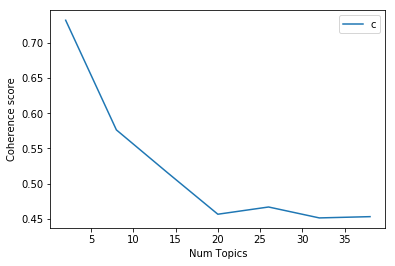

In [71]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

There is excellent coherence at the 5 topics I had used, so we will stay with that, in an effort to avoid being overly selective.

## A (Quasi) Supervised Approach

### Bag of Words

#### BoW with SKLearn CountVectorizer

In [72]:
#Setting additional stopwords
en_stop = set(nltk.corpus.stopwords.words('english'))
stop_words = en_stop.union(set(['machine','business','analytics','learning','technology',
                              'system', 'databasejava', 'andcollaborate', 'toolsadditional', 'offhealthcare',
                               'includeproviding', 'workflowsmentor', 'forecastingvideo', 'areadatastax',
                               'learninghighly']))

In [73]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def clean_text(text):
    # 1. Remove HTML
    soup = BeautifulSoup(text)
    souped = soup.get_text()
    #
    # 2. Remove non-letters        
    #letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    #
    # 3. Convert to lower case, split into individual words
    lower_case = letters_only.lower() 
    words = tok.tokenize(lower_case)

    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = stop_words                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    #return( " ".join( meaningful_words ))   
    
    return (" ".join(words)).strip()

In [74]:
# remove punctuation from the job titles first
#X['job_description'] = X['job_description'].apply(clean_text)
for text in X:
    for i in range(len(X)):
        X['job_description'][i] = clean_text(X['job_description'][i])

In [75]:
#split up for classification
y = X.job_class
X1 = X.job_description

In [76]:
y_train, y_test = train_test_split(y, test_size=0.25, random_state=42)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

vectorizer = CountVectorizer(stop_words=stop_words, analyzer='word', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)
bow = vectorizer.fit_transform(X1)
print(vectorizer.get_feature_names())

['aa', 'aaa', 'aaai', 'aacareers', 'aacer', 'aachen', 'aacsb', 'aae', 'aaeo', 'aafa', 'aaha', 'aap', 'aarc', 'aarp', 'aasi', 'aav', 'aavalar', 'ab', 'abacus', 'abandoned', 'abap', 'abaqus', 'abb', 'abbeel', 'abbott', 'abbreviated', 'abbreviations', 'abbyy', 'abc', 'abd', 'abdominal', 'abductive', 'aberdeen', 'abet', 'abi', 'abide', 'abile', 'abilify', 'abilities', 'abilitiesa', 'abilitiescomputer', 'abilitiesdevelops', 'abilitiesexcellent', 'abilitiesfamiliarity', 'abilitiesmust', 'abilitiesoral', 'abilitiesstrong', 'abilitiesthe', 'ability', 'abilityexcellent', 'abilityskills', 'abinbev', 'abinitio', 'able', 'ableau', 'abled', 'abm', 'abnormal', 'abnormalities', 'abnormality', 'abobe', 'aboriginal', 'abound', 'aboveexperience', 'abovemust', 'abr', 'abrasive', 'abreast', 'abretminimum', 'abroad', 'abs', 'absence', 'absences', 'absense', 'absentee', 'absolute', 'absolutely', 'absorb', 'absorbed', 'absorbing', 'absorption', 'abstract', 'abstracted', 'abstracting', 'abstraction', 'abstrac

In [78]:
#Split into X_train and X_test now that BoW is complete.
X_train, X_test= train_test_split(bow, test_size=0.25, random_state=42)

### Models to test initial Bag of Words

In [79]:
start = time.time()

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.9956756756756757

Test set score: 0.6101511879049676
Done in 0.6711831092834473 seconds


In [80]:
# Logistic Regression Classifier
start = time.time()
lr = LogisticRegression()
lr.fit(X_train,y_train)

print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.9981981981981982

Test set score: 0.7062634989200864
Done in 3.0957417488098145 seconds


The test set performed reasonably well here, so we might want to consider this for tuning later.

### K Means

In [81]:
# Normalize the data.
X_norm = normalize(X_train)

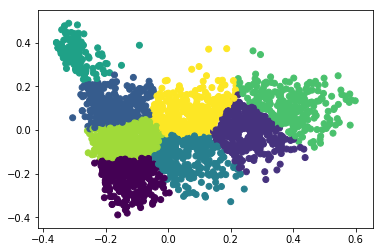

Done in 3.5743319988250732 seconds


In [82]:
start = time.time()
# Reduce it to two components.
X_pca_bow = PCA(2).fit_transform(X_norm.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=8, random_state=42).fit_predict(X_pca_bow)

# Plot the solution.
plt.scatter(X_pca_bow[:, 0], X_pca_bow[:, 1], c=y_pred)
plt.show()
end = time.time()
print("Done in", end - start, "seconds")

Pretty nice clusters, with the exception of the variance of the top right green blob.

### KMeans Mini-Batch

In [83]:
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

true_k = 10
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

km.fit(X_train_norm)
km_train_label = km.labels_
km_test_label = km.predict(X_test_norm)
true_k = 10
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

km.fit(X_train_norm)
km_train_label = km.labels_
km_test_label = km.predict(X_test_norm)

In [84]:
from time import time

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train_norm, y_train)
y_pred = rfc.predict(X_test_norm)

print('Training set score:', rfc.score(X_train_norm, y_train))
print('\nTest set score:', rfc.score(X_test_norm, y_test))
t0 = time()
print("Done in %0.3fs" % (time() - t0))

Training set score: 0.9927927927927928

Test set score: 0.5777537796976242
Done in 0.000s


In [85]:
# Logistic Regression Classifier
import time
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_norm,y_train)

print('Training set score:', lr.score(X_train_norm, y_train))
print('\nTest set score:', lr.score(X_test_norm, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.8093693693693693

Test set score: 0.661987041036717
Done in 1.3635621070861816 seconds


### LSA with BoW

In [86]:
# Logistic Regression Classifier
import time
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_norm,y_train)

print('Training set score:', lr.score(X_train_norm, y_train))
print('\nTest set score:', lr.score(X_test_norm, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.8093693693693693

Test set score: 0.661987041036717
Done in 1.1912689208984375 seconds


In [87]:
start = time.time()
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=5,n_iter=500)
lsa.fit(bow)
terms = vectorizer.get_feature_names()
X_train_lsa = lsa.fit_transform(X_train)
X_test_lsa = lsa.transform(X_test)

for i,comp in enumerate(lsa.components_):
    termsInComp = zip(terms,comp)
    sortedterms = sorted(termsInComp, key=lambda x: x[1],reverse=True)[:10]
    print("Concept %d:" % i)
    for term in sortedterms:
        print(term[0])
    print(" ")
end = time.time()
print("Done in", end - start, "seconds")

Concept 0:
data
experience
work
team
skills
ability
development
science
years
software
 
Concept 1:
data
science
statistical
analysis
models
insights
techniques
modeling
big
spark
 
Concept 2:
data
ability
information
understand
others
required
time
problem
job
appropriate
 
Concept 3:
utilize
operate
residents
report
resident
care
procedures
equipment
maintain
supervisor
 
Concept 4:
experience
customer
management
years
product
ability
technical
software
services
apache
 
Done in 34.757437229156494 seconds


### Bigrams

In [88]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X1, y, test_size=0.25, random_state=42)
count_vect_bigram = CountVectorizer(ngram_range=(1,2))
train_data_bow_bigram = count_vect_bigram.fit_transform(X_train_clean)
test_data_bow_bigram = count_vect_bigram.transform(X_test_clean)

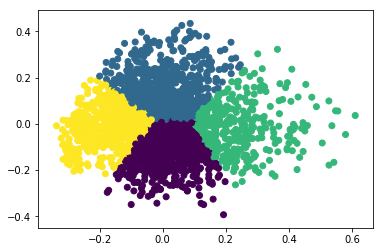

In [89]:
X_norm = normalize(train_data_bow_bigram)
# Reduce it to two components.
X_pca_bow = PCA(2).fit_transform(X_norm.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca_bow)

# Plot the solution.
plt.scatter(X_pca_bow[:, 0], X_pca_bow[:, 1], c=y_pred)
plt.show()

In [90]:
y.unique()

array(['Natural Language Processing', 'Text Mining',
       'Pattern Recognition', 'Machine Learning', 'Text Analytics',
       'Apache Spark', 'Speech Recognition', 'Neural Networks'],
      dtype=object)

In [91]:
labels = ['Natural Language Processing', 'Text Mining',
         'Pattern Recognition', 'Machine Learning', 'Text Analytics',
         'Apache Spark', 'Speech Recognition', 'Neural Networks']

Training set score: 0.9992792792792793

Test set score: 0.7397408207343412
Cross-Valid Bigram Fold Results are:  [0.74468085 0.76156584 0.75714286 0.76428571 0.77697842 0.73818182
 0.77454545 0.73090909 0.70545455 0.73722628]
Mean of Folds are =  0.7490970862520692
Done in %0.3fs 175.54449701309204


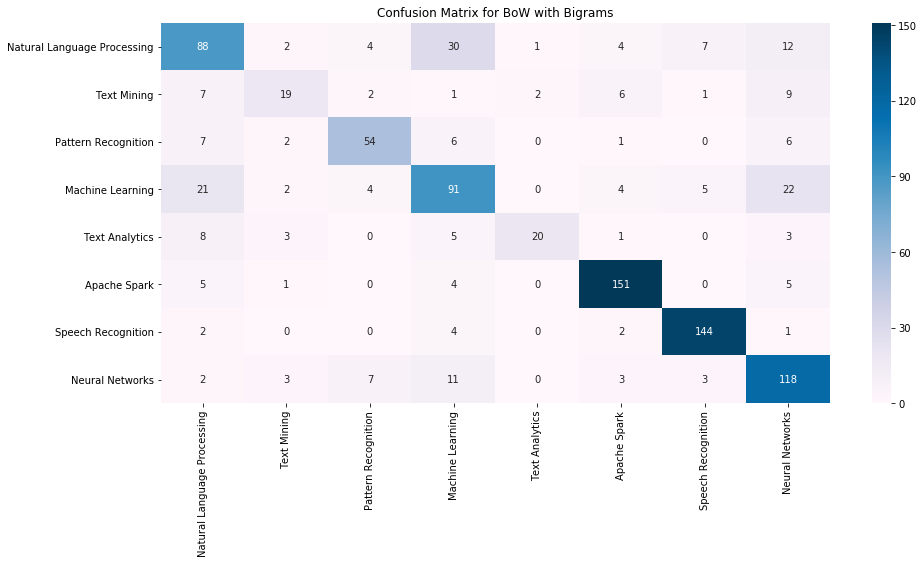

In [92]:
import time
start = time.time()

#Confusion matrix for Bigram BOW with Logistic Regression

lr = LogisticRegression()
lr.fit(train_data_bow_bigram,y_train)

print('Training set score:', lr.score(train_data_bow_bigram, y_train_clean))
print('\nTest set score:', lr.score(test_data_bow_bigram, y_test_clean))

y_pred = lr.predict(test_data_bow_bigram)

conf = confusion_matrix(y_test_clean, y_pred, labels = labels)

cm = pd.DataFrame(conf, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (15,7))
plt.title('Confusion Matrix for BoW with Bigrams')
sns.heatmap(cm, annot=True, cmap="PuBu", fmt = 'd')
crs = cross_val_score(lr, train_data_bow_bigram, y_train_clean, cv=10)
print("Cross-Valid Bigram Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())
end = time.time()
print("Done in %0.3fs", end - start)

In [93]:
import time
start = time.time()

clf = XGBClassifier()  
clf.fit(train_data_bow_bigram,y_train)  
clf.predict(test_data_bow_bigram)
print('Training set score:', clf.score(train_data_bow_bigram, y_train_clean))
print('\nTest set score:', clf.score(test_data_bow_bigram, y_test_clean))
cross_val = cross_val_score(clf, train_data_bow_bigram, y_train_clean)
print('Cross Validation Score:', cross_val)
print('Cross Validation Mean:', cross_val.mean())

Training set score: 0.9866666666666667

Test set score: 0.8995680345572354
Cross Validation Score: [0.91271552 0.92224622 0.90119435]
Cross Validation Mean: 0.9120520305022796


In [ ]:
alg = XGBClassifier(objective='binary:logistic')

clf = GridSearchCV(alg,{'max_depth': [2,4,6],
                        'n_estimators': [50,100,200]}, 
                        verbose=1, 
                        scoring='neg_log_loss')
train = clf.fit(train_data_bow_bigram,y_train)
bigram_pred = clf.predict(test_data_bow_bigram.toarray())
birgram_pred_prob = clf.predict_proba(test_data_bow_bigram.toarray())

print('Training set score:', clf.score(train_data_bow_bigram.toarray(), y_train_clean))
print('\nTest set score:', clf.score(test_data_bow_bigram.toarray(), y_test_clean))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
conf = confusion_matrix(y_test_clean, bigram_pred, labels = handles)

df_cm = pd.DataFrame(conf, index = [i for i in handles],
                  columns = [i for i in handles])
plt.figure(figsize = (15,7))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt = 'd')

In [ ]:
#from tqdm import tqdm

#for i in tqdm(range(10)):
    #time.sleep(3)

    #alg = XGBClassifier(objective='binary:logistic')

    #clf = GridSearchCV(alg,{'max_depth': [2,4,6],
                        #'n_estimators': [50,100,200]}, 
                        #verbose=1, 
                        #scoring='neg_log_loss')

    #clf.fit(train_data_bow_bigram,y_train)  
    #clf.predict(test_data_bow_bigram)
    #print('Training set score:', clf.score(train_data_bow_bigram, y_train_clean))
    #print('\nTest set score:', clf.score(test_data_bow_bigram, y_test_clean))
    #cross_val = cross_val_score(clf, train_data_bow_bigram, y_train_clean)
    #print('Cross Validation Score:', cross_val)
    #print('Cross Validation Mean:', cross_val.mean())

## TF-IDF Analysis

### Train and Test Sets


In [ ]:
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(bow)
tfidf.shape

In [ ]:
X_train_tfidf, X_test_tfidf = train_test_split(tfidf, test_size=0.25, random_state=42)

In [ ]:
import time

start = time.time()

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train_tfidf, y_train)
y_pred = rfc.predict(X_test_tfidf)

print('Training set score:', rfc.score(X_train_tfidf, y_train))
print('\nTest set score:', rfc.score(X_test_tfidf, y_test))
end = time.time()
print("Done in", end - start, "seconds")

In [ ]:
# Logistic Regression Classifier
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_tfidf,y_train)

print('Training set score:', lr.score(X_train_tfidf, y_train))
print('\nTest set score:', lr.score(X_test_tfidf, y_test))
end = time.time()
print("Done in", end - start, "seconds")

In [ ]:
start = time.time()
# Normalize the data.
X_normt = normalize(tfidf)
# Reduce it to two components.
X_pcat = PCA(2).fit_transform(X_normt.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pcat)

# Plot the solution.
plt.scatter(X_pcat[:, 0], X_pcat[:, 1], c=y_pred)
plt.show()
end = time.time()
print("Done in %0.3fs", end - start)

In [ ]:
start = time.time()
rfc = ensemble.RandomForestClassifier()

vectorizer1 = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the tweets
                             min_df=2, # only use words that appear at least 2x
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case 
                             use_idf=True,
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter tweets get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

X_train_tfidf = vectorizer1.fit_transform(X_train_clean)
X_test_tfidf = vectorizer1.transform(X_test_clean)

fit = rfc.fit(X_train_tfidf, y_train)
y_pred = rfc.predict(X_test_tfidf)

print('Training set score:', rfc.score(X_train_tfidf, y_train))
print('\nTest set score:', rfc.score(X_test_tfidf, y_test))
end = time.time()
print("Done in %0.3fs", end - start)

In [ ]:
start = time.time()
X = X1
X_norm_tfidf = normalize(vectorizer1.fit_transform(X))

true_k = 10
labels = y
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

print("Clustering sparse data with %s" % km)
km.fit(X_norm_tfidf)
mini_labels = km.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_norm_tfidf, km.labels_, sample_size=5000))
end = time.time()
print("Done in %0.3fs", end - start)

In [ ]:
df['MiniBatchLabels'] = mini_labels

In [ ]:
for label in set(mini_labels):
    print('Cluster: %d' % label)
    print(df[df.MiniBatchLabels == label].groupby('Org').count())
    print('')

In [ ]:
#Let's check Cluster 0 - the largest, and likely a catch-all for tweets that did not fall into other clusters
shuffle(df[df.MiniBatchLabels == 0]).head(10)

In [ ]:
#Let's check Cluster 1
shuffle(df[df.MiniBatchLabels == 1]).head(10)

In [ ]:
#Cluster 2
shuffle(df[df.MiniBatchLabels == 2]).head(10)

### LSA with TF-IDF

In [ ]:
print("Number of features: %d" % X_train_tfidf.get_shape()[1])

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space to about 10% of the original.
svd= TruncatedSVD(2100)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)
X_test_lsa = lsa.transform(X_test_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of tweets our solution considers similar, for the first five identified topics
tweets_by_component=pd.DataFrame(X_train_lsa, index=list(X_train))
for i in range(5):
    print('Component {}:'.format(i))
    print(tweets_by_component.loc[:,i].sort_values(ascending=False)[0:10])
import time
print(time.time())

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=5,n_iter=500)
lsa.fit(tfidf)
terms = vectorizer.get_feature_names()

for i,comp in enumerate(lsa.components_):
    termsInComp = zip(terms,comp)
    sortedterms = sorted(termsInComp, key=lambda x: x[1],reverse=True)[:10]
    print("Concept %d:" % i)
    for term in sortedterms:
        print(term[0])
    print(" ")

In [ ]:
#Try a GBM classifier here, using TF-IDF 

clf = ensemble.GradientBoostingClassifier()
train = clf.fit(X_train_tfidf, y_train)
tfidf_pred = clf.predict(X_test_tfidf.toarray())

print('Training set score:', clf.score(X_train_tfidf.toarray(), y_train))
print('\nTest set score:', clf.score(X_test_tfidf.toarray(), y_test))

In [ ]:
#Confusion matrix for GBM performance visualization on TF-IDF

conf = confusion_matrix(y_test, tfidf_pred, labels = handles)

df_cm = pd.DataFrame(conf, index = [i for i in handles],
                  columns = [i for i in handles])
plt.figure(figsize = (15,7))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt = 'd')

In [ ]:
X_train_tfidf.shape

In [ ]:
#LSA with Tf-idf
mlp = neural_network.MLPClassifier(hidden_layer_sizes = (100,), activation = 'logistic')
train = mlp.fit(X_train_lsa, y_train)
mlp_y_pred = mlp.predict(X_test_lsa)

print('Training set score:', mlp.score(X_train_lsa, y_train))
print('\nTest set score:', mlp.score(X_test_lsa, y_test))